In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fas_train = pd.read_csv('archive/fashion-mnist_train.csv')
fas_test = pd.read_csv('archive/fashion-mnist_test.csv')

ln 3 to ln 7 : https://www.kaggle.com/egenaz/fashion-mnist-modeling-w-randomforestclassifier 부분 참조

In [3]:
!pip install idx2numpy
import idx2numpy

In [4]:
file = 'archive/t10k-images-idx3-ubyte'
array = idx2numpy.convert_from_file(file)

In [5]:
array.shape

(10000, 28, 28)

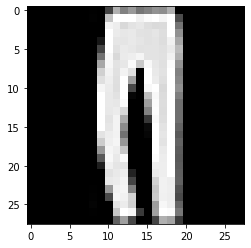

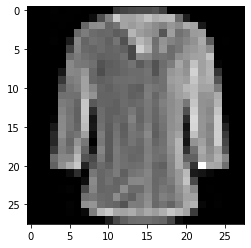

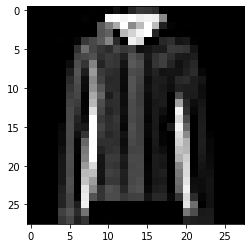

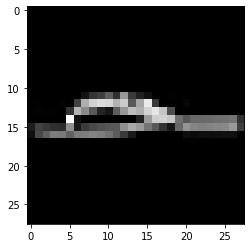

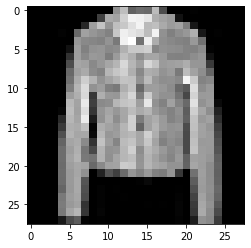

In [6]:
for i in [2, 4, 6, 8, 10]:
    plt.imshow(array[i], cmap = 'gray')
    plt.show()

In [7]:
print(fas_train.shape)
print(fas_test.shape)

(60000, 785)
(10000, 785)


In [8]:
fas_train['label'].value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

0 T-shirt/top  
1 Trouser  
2 Pullover  
3 Dress  
4 Coat  
5 Sandal  
6 Shirt  
7 Sneaker  
8 Bag  
9 Ankle boot

### 데이터 전처리

train데이터는 클래스별로 6000개씩 데이터가 있는데 60000개의 데이터로 돌리기에는  
시간이 너무 많이 소요(아래에서 실험)  

=> 프로젝트임을 고려하여 많은 시간과 정확도보다는 많은 테스트, 성능 향상 등에 초점  

=> 각 클래스별로 랜덤하게 1000개씩을 뽑아 10000개의 데이터로 활용하고자 함  

In [9]:
# 비어있는 DataFrame 생성
fas_train_random = pd.DataFrame()

# 각 클래스에서 1000개를 랜덤하게 뽑아서 fas_train_random에 저장
for i in range(10) :
    fas_ = fas_train[fas_train['label'] == i].sample(n=1000)
    fas_train_random = fas_train_random.append(fas_)

In [10]:
fas_train_random.shape

(10000, 785)

In [11]:
fas_train_random.head(20)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
57308,0,0,0,0,0,0,0,0,0,0,...,123,119,131,38,0,0,0,0,0,0
49291,0,0,0,0,0,0,0,0,0,0,...,62,127,68,181,215,122,0,0,0,0
40433,0,0,0,0,7,133,108,98,113,143,...,0,0,0,4,0,46,139,126,59,0
40932,0,0,0,0,0,0,0,1,0,3,...,144,129,73,0,0,2,0,0,0,0
38714,0,0,0,0,0,0,0,0,0,0,...,111,93,87,15,0,0,0,0,0,0
38899,0,0,0,0,0,0,1,0,0,0,...,93,96,83,0,0,0,0,0,0,0
4042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13547,0,0,0,0,0,0,2,0,0,0,...,19,0,0,0,1,0,0,0,0,0
12028,0,0,0,0,0,0,0,1,3,3,...,0,0,0,1,3,0,0,0,0,0


현재 클래스가 0부터 9까지 정렬되어있는 상태이므로 이를 적절하게 섞어줌

In [12]:
fas_train_new = fas_train_random.sample(frac = 1)

In [13]:
fas_train_new.head(20)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
19828,1,0,0,0,0,0,0,1,0,0,...,194,170,108,69,6,0,0,0,0,0
42162,0,0,0,0,0,0,0,0,0,0,...,154,156,160,0,0,1,0,0,0,0
51591,2,0,0,0,0,0,0,0,0,0,...,2,0,0,0,1,0,0,0,0,0
26579,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19087,6,0,0,0,0,0,0,0,0,4,...,0,0,0,151,69,3,0,0,0,0
52806,3,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
14354,3,0,0,0,0,0,0,0,0,1,...,163,57,0,0,1,0,0,0,0,0
5562,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57014,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41202,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,173,110,61,0,0,0


##### 원본 데이터(60000) KNN 검증

시간 측정을 위해 원본 데이터(60000행)로 knn과 cross_Validation을 사용한 결과  

약 30분 이상의 시간이 소요됨.

In [17]:
X_train, X_val, y_train, y_val = train_test_split(fas_train.drop(['label'], axis = 1), fas_train['label'], test_size = 0.2, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

cvs = cross_val_score(clf, X = X_val, y = y_val, cv = 5)

In [18]:
print(cvs)

[0.8275     0.81791667 0.81416667 0.82458333 0.81583333]


fas_train_new 데이터의 80%를 훈련 데이터로, 20%를 검증 데이터로 사용

In [19]:
X = fas_train_new.drop(['label'], axis = 1)
y = fas_train_new['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

검증 데이터에 대해서 전체 데이터를 사용했을 때보다 조금 떨어진 성능을 보임

##### KNN을 통한 분류(검증 데이터)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

cvs = cross_val_score(knn, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.79   0.7575 0.775  0.77   0.8025]


In [21]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[167   0   7   4   1   0  24   0   1   0]
 [  2 201   2   1   0   0   2   0   0   1]
 [  9   0 145   2  28   0  14   0   0   0]
 [ 11   0   3 151   8   0   6   0   1   0]
 [  1   0  28   7 150   0  27   0   0   0]
 [  0   0   0   0   0 158   0  39   0  14]
 [ 44   0  33   4  12   0 111   0   4   0]
 [  0   0   0   0   0   2   0 168   0  17]
 [  4   1   4   1   1   0   2   1 182   0]
 [  0   0   1   0   0   0   0   4   0 189]]


In [22]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       204
           1       1.00      0.96      0.98       209
           2       0.65      0.73      0.69       198
           3       0.89      0.84      0.86       180
           4       0.75      0.70      0.73       213
           5       0.99      0.75      0.85       211
           6       0.60      0.53      0.56       208
           7       0.79      0.90      0.84       187
           8       0.97      0.93      0.95       196
           9       0.86      0.97      0.91       194

    accuracy                           0.81      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000



##### KNN을 통한 분류(테스트 데이터)

In [23]:
# 테스트 세트 준비
X_test = fas_test.drop(['label'], axis = 1)
y_test = fas_test['label']

y_test_pred = knn.predict(X_test)

In [24]:
cvs = cross_val_score(knn, X = X_test, y = y_test, cv = 5)
print(cvs)

[0.814  0.8215 0.8165 0.804  0.833 ]


In [25]:
print("테스트 데이터 : ")
print(confusion_matrix(y_test, y_test_pred))

테스트 데이터 : 
[[821   1  30  17   4   0 114   1  12   0]
 [ 12 956   6  16   2   0   8   0   0   0]
 [ 28   2 770  12 106   0  78   1   3   0]
 [ 64  17  12 861  30   0  16   0   0   0]
 [  7   0 164  50 697   0  81   0   1   0]
 [  5   0   2   1   0 730  10 153   5  94]
 [222   1 136  23  67   0 544   0   7   0]
 [  0   0   0   0   0   9   0 907   0  84]
 [  9   2  24   4   9   0  17  11 921   3]
 [  0   0   1   0   0   9   0  39   0 951]]


In [26]:
print("테스트 데이터 : ")
print(classification_report(y_test, y_test_pred))

테스트 데이터 : 
              precision    recall  f1-score   support

           0       0.70      0.82      0.76      1000
           1       0.98      0.96      0.97      1000
           2       0.67      0.77      0.72      1000
           3       0.88      0.86      0.87      1000
           4       0.76      0.70      0.73      1000
           5       0.98      0.73      0.84      1000
           6       0.63      0.54      0.58      1000
           7       0.82      0.91      0.86      1000
           8       0.97      0.92      0.95      1000
           9       0.84      0.95      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



##### KNN 결과 분석

1. 검증 데이터에 비해서 테스트 데이터가 조금 더 정확한 결과를 보임  
2. 4번(코트)과 6번(셔츠)가 비교적 낮은 정확도를 보임  
3. 비교적 안정적인 결과를 보임

##### RandomForest를 통한 분류(검증 데이터)

1. n_estimators = 10, max_depth = 5  
- 시간을 계산하기 위해서 작은 값으로 설정(1초 이내)  
- 정확도가 매우 낮음(6번의 경우 f1점수가 : 0.12)

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

cvs = cross_val_score(rf, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.765  0.7525 0.695  0.7325 0.775 ]


In [28]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[166   1  11  20   3   1   1   0   1   0]
 [  0 181   0  28   0   0   0   0   0   0]
 [  3   0 133   2  55   0   3   0   2   0]
 [ 10   1   6 158   4   0   1   0   0   0]
 [  2   0  28  24 155   0   1   0   3   0]
 [  0   0   0   0   0 181   0  20   2   8]
 [ 52   0  52  16  62   1  14   0  11   0]
 [  0   0   0   0   0   6   0 155   0  26]
 [  0   0   9   5   4   1   0   0 177   0]
 [  0   0   0   1   0   4   0  12   0 177]]


In [29]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       204
           1       0.99      0.87      0.92       209
           2       0.56      0.67      0.61       198
           3       0.62      0.88      0.73       180
           4       0.55      0.73      0.62       213
           5       0.93      0.86      0.89       211
           6       0.70      0.07      0.12       208
           7       0.83      0.83      0.83       187
           8       0.90      0.90      0.90       196
           9       0.84      0.91      0.87       194

    accuracy                           0.75      2000
   macro avg       0.76      0.75      0.73      2000
weighted avg       0.76      0.75      0.72      2000



2. n_estimators = 100, max_depth = 20  
- 시간 : 약 40초 내외  
- 성능은 향상(6번에 대한 정확도가 비약적으로 상승, 다른 부분들도 준수)

In [30]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 20, random_state = 0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

cvs = cross_val_score(rf, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.8225 0.805  0.81   0.8175 0.795 ]


In [31]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[170   0   5   7   1   0  21   0   0   0]
 [  1 203   1   3   0   0   1   0   0   0]
 [  2   0 151   3  31   0  10   0   1   0]
 [  5   0   1 161   8   0   4   0   1   0]
 [  1   0  17   8 173   0  12   0   2   0]
 [  0   0   0   0   0 195   0  11   2   3]
 [ 34   0  23   6  23   0 115   0   7   0]
 [  0   0   0   0   0   6   0 165   0  16]
 [  1   0   2   1   2   1   2   0 187   0]
 [  0   0   0   0   0   4   0   8   0 182]]


In [32]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       204
           1       1.00      0.97      0.99       209
           2       0.76      0.76      0.76       198
           3       0.85      0.89      0.87       180
           4       0.73      0.81      0.77       213
           5       0.95      0.92      0.94       211
           6       0.70      0.55      0.62       208
           7       0.90      0.88      0.89       187
           8       0.94      0.95      0.94       196
           9       0.91      0.94      0.92       194

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



3. GridSearch를 통해서 최적의 파라미터 추출
- 시간 : 2시간 이상
- 성능이 2번에 비해서 오히려 안좋음 => 조건을 많이 주는 것이 오히려 안좋을 수 있다고 판단

In [37]:
params = {'max_depth':[30, 50, 70],
          'min_samples_leaf':[10, 15, 20],
          'min_samples_split':[8, 16, 20],
          'n_estimators':[100, 200, 400, 600]
         }

In [38]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=0)

grid_cv = GridSearchCV(rf, params, cv=2)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [30, 50, 70],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100, 200, 400, 600]})

In [39]:
grid_cv.best_params_

{'max_depth': 30,
 'min_samples_leaf': 10,
 'min_samples_split': 8,
 'n_estimators': 600}

In [40]:
rf = RandomForestClassifier(n_estimators=600, max_depth=30, min_samples_leaf=10, min_samples_split=8, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

cvs = cross_val_score(rf, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.8225 0.7875 0.785  0.81   0.79  ]


In [41]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[165   1   4   9   0   0  24   0   1   0]
 [  1 201   3   3   0   0   1   0   0   0]
 [  4   0 146   1  39   1   5   0   2   0]
 [  5   1   1 160   7   0   6   0   0   0]
 [  1   0  14  10 173   0  14   0   1   0]
 [  0   0   0   0   0 193   0  13   1   4]
 [ 37   0  27   8  21   0 108   0   7   0]
 [  0   0   0   0   0   4   0 163   0  20]
 [  0   0   2   3   2   1   2   0 186   0]
 [  0   0   0   0   0   3   0   6   0 185]]


In [42]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       204
           1       0.99      0.96      0.98       209
           2       0.74      0.74      0.74       198
           3       0.82      0.89      0.86       180
           4       0.71      0.81      0.76       213
           5       0.96      0.91      0.93       211
           6       0.68      0.52      0.59       208
           7       0.90      0.87      0.88       187
           8       0.94      0.95      0.94       196
           9       0.89      0.95      0.92       194

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



4. n_estimators = 500, max_depth = 20

In [43]:
rf = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

cvs = cross_val_score(rf, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.8325 0.8025 0.8025 0.8225 0.7975]


In [44]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[169   1   5   7   1   0  20   0   1   0]
 [  1 203   1   3   0   0   1   0   0   0]
 [  2   0 151   3  33   0   7   0   2   0]
 [  5   0   0 162   6   0   7   0   0   0]
 [  1   0  16   9 173   0  13   0   1   0]
 [  0   0   0   0   0 196   0  10   2   3]
 [ 34   0  25   8  20   0 114   0   7   0]
 [  0   0   0   0   0   3   0 167   0  17]
 [  1   0   2   1   2   0   1   0 189   0]
 [  0   0   0   0   0   4   0   6   0 184]]


In [45]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       204
           1       1.00      0.97      0.98       209
           2       0.76      0.76      0.76       198
           3       0.84      0.90      0.87       180
           4       0.74      0.81      0.77       213
           5       0.97      0.93      0.95       211
           6       0.70      0.55      0.61       208
           7       0.91      0.89      0.90       187
           8       0.94      0.96      0.95       196
           9       0.90      0.95      0.92       194

    accuracy                           0.85      2000
   macro avg       0.85      0.86      0.85      2000
weighted avg       0.85      0.85      0.85      2000



##### RandomForest를 통한 분류(테스트 데이터)

테스트용 데이터 검증 모델로 n_estimators = 500, max_depth = 20 옵션을 사용

In [46]:
y_test_pred = rf.predict(X_test)

In [48]:
cvs = cross_val_score(rf, X = X_test, y = y_test, cv = 5)
print(cvs)

[0.859  0.863  0.8615 0.8535 0.8605]


In [49]:
print("테스트 데이터 : ")
print(confusion_matrix(y_test, y_test_pred))

테스트 데이터 : 
[[807   1  18  60   2   2  95   0  15   0]
 [  2 964   6  21   1   1   5   0   0   0]
 [  8   3 777   9 135   1  54   0  13   0]
 [ 22  10   6 920  22   0  19   0   1   0]
 [  1   1  69  41 848   0  36   0   4   0]
 [  0   0   0   0   0 923   0  50   5  22]
 [177   4 118  34  90   0 555   0  22   0]
 [  0   0   0   0   0  31   0 902   1  66]
 [  1   1   9   2   4   3   9   4 966   1]
 [  0   0   1   0   0  12   0  48   3 936]]


In [50]:
print("테스트 데이터 : ")
print(classification_report(y_test, y_test_pred))

테스트 데이터 : 
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.77      0.78      0.78      1000
           3       0.85      0.92      0.88      1000
           4       0.77      0.85      0.81      1000
           5       0.95      0.92      0.94      1000
           6       0.72      0.56      0.63      1000
           7       0.90      0.90      0.90      1000
           8       0.94      0.97      0.95      1000
           9       0.91      0.94      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



##### RandomForest 결과 분석

1. 검증 데이터에 비해서 테스트 데이터가 조금 더 정확한 결과를 보임  
2. KNN에 비하면 전체적으로 높은 정확도  
3. 6번은 정확도가 아직 많이 부족하지만 다른 클래스들은 비교적 잘 분류함

##### XGBoost을 통한 분류(검증 데이터)

1. default  
- 전체적인 정확도는 랜덤 포레스트와 비슷함
- 6번에 대한 정확도가 많이 올라감 => XGBoost을 통해서 전체적인 정확도를 보장할 수 있다고 판단

In [52]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)

cvs = cross_val_score(xgb, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:50:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:52:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:52:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:53:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:53:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.865  0.795  0.805  0.815  0.8075]


In [53]:
print(confusion_matrix(y_val, y_pred))

[[173   0   4   9   1   0  17   0   0   0]
 [  1 204   0   2   0   0   2   0   0   0]
 [  7   0 159   1  21   0   9   0   1   0]
 [  5   0   3 161   8   0   3   0   0   0]
 [  0   0  15   6 180   0  12   0   0   0]
 [  0   0   0   0   0 197   0  11   0   3]
 [ 24   0  26   6  14   0 133   0   5   0]
 [  0   0   0   0   0   1   0 175   0  11]
 [  1   0   1   1   4   0   4   0 185   0]
 [  0   0   0   0   0   2   0   5   0 187]]


In [56]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       204
           1       1.00      0.98      0.99       209
           2       0.76      0.80      0.78       198
           3       0.87      0.89      0.88       180
           4       0.79      0.85      0.82       213
           5       0.98      0.93      0.96       211
           6       0.74      0.64      0.69       208
           7       0.92      0.94      0.93       187
           8       0.97      0.94      0.96       196
           9       0.93      0.96      0.95       194

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



2. 초기값 설정 (참고 : https://www.kaggle.com/lifesailor/xgboost)
- 평균적으로 0.88의 정확도를 보임
- 좋은 모델이지만 시간이 많이 소요(cross_validation 과정에서 한 번당 약 20분의 시간이 필요)
- n_estimators를 조금 줄이고, 다른 파라미터를 조절하고자 함

In [57]:
xgb = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    scale_pos_weight=1,
    )
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)

cvs = cross_val_score(xgb, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:25:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:25:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:37:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.8575 0.8175 0.815  0.8225 0.835 ]


In [58]:
print(confusion_matrix(y_val, y_pred))

[[173   1   3   9   0   0  18   0   0   0]
 [  1 205   0   1   0   0   2   0   0   0]
 [  5   0 158   2  23   0   9   0   1   0]
 [  6   1   1 160   7   0   5   0   0   0]
 [  0   0  19   7 173   0  14   0   0   0]
 [  0   0   0   0   0 195   0  12   1   3]
 [ 20   0  22   7  16   0 139   0   4   0]
 [  0   0   0   0   0   1   0 175   0  11]
 [  1   0   2   0   3   0   3   1 186   0]
 [  0   0   0   0   0   2   0   5   0 187]]


In [59]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       204
           1       0.99      0.98      0.99       209
           2       0.77      0.80      0.78       198
           3       0.86      0.89      0.87       180
           4       0.78      0.81      0.80       213
           5       0.98      0.92      0.95       211
           6       0.73      0.67      0.70       208
           7       0.91      0.94      0.92       187
           8       0.97      0.95      0.96       196
           9       0.93      0.96      0.95       194

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



3. 파라미터 튜닝
- 2번보다 정확도가 떨어짐 다른 방향을 고려해봄

In [60]:
xgb = XGBClassifier(
    learning_rate =0.01,
    n_estimators=400,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    )
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)

cvs = cross_val_score(xgb, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:50:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:58:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:00:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:02:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:06:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.8575 0.795  0.8175 0.8075 0.8075]


In [61]:
print(confusion_matrix(y_val, y_pred))

[[172   1   4   8   0   0  18   0   1   0]
 [  2 200   2   4   0   0   1   0   0   0]
 [  4   0 149   2  32   1   9   0   1   0]
 [  6   1   1 159   8   0   5   0   0   0]
 [  0   0  18   9 169   0  17   0   0   0]
 [  0   0   0   0   0 192   0  15   1   3]
 [ 28   0  24   7  22   1 121   0   5   0]
 [  0   0   0   0   0   1   0 171   0  15]
 [  1   0   2   3   5   0   4   0 181   0]
 [  0   0   0   0   0   1   0   3   0 190]]


In [62]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       204
           1       0.99      0.96      0.97       209
           2       0.74      0.75      0.75       198
           3       0.83      0.88      0.85       180
           4       0.72      0.79      0.75       213
           5       0.98      0.91      0.94       211
           6       0.69      0.58      0.63       208
           7       0.90      0.91      0.91       187
           8       0.96      0.92      0.94       196
           9       0.91      0.98      0.95       194

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



4. 파라미터 튜닝
- n_estimators를 유지하고, 다른 매개변수를 조절하고자 함
- 초기값 모델(1번)에는 조금 못 미치는 결과

In [63]:
xgb = XGBClassifier(
    learning_rate =0.01,
    n_estimators=1000,
    max_depth=3,
    min_child_weight=5,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    )
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)

cvs = cross_val_score(xgb, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:22:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:24:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.8625 0.8025 0.8    0.82   0.8225]


In [64]:
print(confusion_matrix(y_val, y_pred))

[[167   1   3  10   0   0  22   0   1   0]
 [  2 202   1   2   1   0   1   0   0   0]
 [  3   0 150   1  30   1  12   0   1   0]
 [  6   1   1 158   9   0   5   0   0   0]
 [  0   0  20   7 168   0  18   0   0   0]
 [  0   0   0   0   0 195   0  12   1   3]
 [ 32   0  22   7  20   0 123   0   4   0]
 [  0   0   0   0   0   0   0 175   0  12]
 [  0   0   1   2   4   0   4   0 185   0]
 [  0   0   0   0   0   1   0   4   0 189]]


In [65]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       204
           1       0.99      0.97      0.98       209
           2       0.76      0.76      0.76       198
           3       0.84      0.88      0.86       180
           4       0.72      0.79      0.76       213
           5       0.99      0.92      0.96       211
           6       0.66      0.59      0.63       208
           7       0.92      0.94      0.93       187
           8       0.96      0.94      0.95       196
           9       0.93      0.97      0.95       194

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



5. GridSearch를 통해서 최적의 파라미터 추출
- 시간 : 3시간 30분
- 초기값 모델에서 max_depth, min_child_weight, gamma만 변경하여 최적의 파라미터를 찾고자 함

In [68]:
params = {'max_depth':[3,4,5],
          'min_child_weight':[1,3,5],
          'gamma':[0.1,0.2]
         }

xgb = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    )

grid_cv = GridSearchCV(xgb, params, cv=2)
grid_cv.fit(X_train, y_train)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:28:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:39:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:43:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:51:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:10:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:15:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:24:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:34:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:41:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:46:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:55:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:05:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:23:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:27:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:40:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:50:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:00:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:08:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:32:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0.1,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.8,
                                     tree_method=No

In [69]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'gamma': 0.1, 'max_depth': 4, 'min_child_weight': 1}
0.8612500000000001


In [310]:
xgb = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=4,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    )
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:41:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [314]:
cvs = cross_val_score(xgb, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:23:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:34:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:38:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.8575 0.8025 0.805  0.815  0.825 ]


In [315]:
print(confusion_matrix(y_val, y_pred))

[[174   1   3   9   0   0  17   0   0   0]
 [  1 206   0   1   0   0   1   0   0   0]
 [  7   0 156   2  24   0   7   0   2   0]
 [  7   1   1 159   8   0   4   0   0   0]
 [  0   0  17   6 176   0  14   0   0   0]
 [  0   0   0   0   0 195   0  12   1   3]
 [ 25   0  22   4  16   0 137   0   4   0]
 [  0   0   0   0   0   2   0 174   0  11]
 [  0   0   2   0   3   0   4   0 187   0]
 [  0   0   0   0   0   1   0   4   0 189]]


In [316]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       204
           1       0.99      0.99      0.99       209
           2       0.78      0.79      0.78       198
           3       0.88      0.88      0.88       180
           4       0.78      0.83      0.80       213
           5       0.98      0.92      0.95       211
           6       0.74      0.66      0.70       208
           7       0.92      0.93      0.92       187
           8       0.96      0.95      0.96       196
           9       0.93      0.97      0.95       194

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



##### XGBoost를 통한 분류(테스트 데이터)

테스트용 데이터 검증 모델로 GridSearch의 결과로 나온 옵션을 사용

In [71]:
xgb = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=4,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    )
xgb.fit(X_train, y_train)

y_test_pred = xgb.predict(X_test)

[15:07:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
cvs = cross_val_score(xgb, X = X_test, y = y_test, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:26:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:28:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:31:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:36:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.8575 0.8025 0.805  0.815  0.825 ]


In [73]:
print("테스트 데이터 : ")
print(confusion_matrix(y_test, y_test_pred))

테스트 데이터 : 
[[829   0  16  43   1   1  93   2  15   0]
 [  3 973   5  13   0   2   4   0   0   0]
 [ 13   2 821  12  77   0  67   0   8   0]
 [ 20   8   9 918  22   0  23   0   0   0]
 [  0   0  64  33 845   1  54   0   3   0]
 [  0   0   0   1   0 934   0  39   4  22]
 [141   5  92  27  65   1 658   0  11   0]
 [  0   0   0   0   0  15   0 929   1  55]
 [  1   1   7   3   3   4  12   2 965   2]
 [  0   0   0   0   0   5   1  47   4 943]]


In [74]:
print("테스트 데이터 : ")
print(classification_report(y_test, y_test_pred))

테스트 데이터 : 
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.81      0.82      0.82      1000
           3       0.87      0.92      0.90      1000
           4       0.83      0.84      0.84      1000
           5       0.97      0.93      0.95      1000
           6       0.72      0.66      0.69      1000
           7       0.91      0.93      0.92      1000
           8       0.95      0.96      0.96      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



##### XGBoost 결과 분석

1. 검증 데이터에 비해서 테스트 데이터가 조금 더 정확한 결과를 보임  
2. 이전의 분류기에 비하면 높은 정확도
3. 2번(초기값)과 전체적인 정확도는 비슷하지만, 2번이 특정 값들을 더 잘 분류했다면 최종 결과는 전체적으로 골고루 잘 분류한듯 함
4. 6번에 대한 정확도는 0.7 내외가 한계라고 판단

##### MLP를 통한 분류(검증 데이터)

1. 초기값 설정  
- 데이터의 크기를 고려하여 solver='adam'을 제공하였고, 데이터가 비교적 단순하여 레이어의 사이즈를 2개의 은닉층에 10개의 노드를 사용함.
- 모두 3으로 예측

In [75]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10),
                    alpha=0.0001,
                    solver='adam',
                    max_iter=100,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [77]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.1075 0.105  0.1025 0.105  0.105 ]


In [78]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[  0   0   0 204   0   0   0   0   0   0]
 [  0   0   0 209   0   0   0   0   0   0]
 [  0   0   0 198   0   0   0   0   0   0]
 [  0   0   0 180   0   0   0   0   0   0]
 [  0   0   0 213   0   0   0   0   0   0]
 [  0   0   0 211   0   0   0   0   0   0]
 [  0   0   0 208   0   0   0   0   0   0]
 [  0   0   0 187   0   0   0   0   0   0]
 [  0   0   0 196   0   0   0   0   0   0]
 [  0   0   0 194   0   0   0   0   0   0]]


In [79]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       204
           1       0.00      0.00      0.00       209
           2       0.00      0.00      0.00       198
           3       0.09      1.00      0.17       180
           4       0.00      0.00      0.00       213
           5       0.00      0.00      0.00       211
           6       0.00      0.00      0.00       208
           7       0.00      0.00      0.00       187
           8       0.00      0.00      0.00       196
           9       0.00      0.00      0.00       194

    accuracy                           0.09      2000
   macro avg       0.01      0.10      0.02      2000
weighted avg       0.01      0.09      0.01      2000



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. 조금 더 복잡한 모델
- 이번엔 모두 8로 예측 => 아직은 너무 간단한 모델이라고 생각

In [80]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100),
                    alpha=0.001,
                    solver='sgd',
                    max_iter=100,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [81]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.105 0.105 0.105 0.105 0.105]


In [82]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[  0   0   0   0   0   0   0   0 204   0]
 [  0   0   0   0   0   0   0   0 209   0]
 [  0   0   0   0   0   0   0   0 198   0]
 [  0   0   0   0   0   0   0   0 180   0]
 [  0   0   0   0   0   0   0   0 213   0]
 [  0   0   0   0   0   0   0   0 211   0]
 [  0   0   0   0   0   0   0   0 208   0]
 [  0   0   0   0   0   0   0   0 187   0]
 [  0   0   0   0   0   0   0   0 196   0]
 [  0   0   0   0   0   0   0   0 194   0]]


In [83]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       204
           1       0.00      0.00      0.00       209
           2       0.00      0.00      0.00       198
           3       0.00      0.00      0.00       180
           4       0.00      0.00      0.00       213
           5       0.00      0.00      0.00       211
           6       0.00      0.00      0.00       208
           7       0.00      0.00      0.00       187
           8       0.10      1.00      0.18       196
           9       0.00      0.00      0.00       194

    accuracy                           0.10      2000
   macro avg       0.01      0.10      0.02      2000
weighted avg       0.01      0.10      0.02      2000



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. 파라미터 튜닝
- 은닉층을 복잡하게 설계하니 다양한 클래스로 예측함을 확인 => 조금 더 복잡하게 하고자 함

In [84]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 100, 100, 100, 10),
                    alpha=0.001,
                    solver='sgd',
                    max_iter=100,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [85]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.39   0.2575 0.2    0.1975 0.2125]


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [86]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[ 77   0  71  48   0   0   0   0   7   1]
 [  0 199   3   6   0   0   0   0   0   1]
 [ 50   1 119  10   0   0   2   0  16   0]
 [ 25  40  18  94   0   0   0   1   2   0]
 [ 90   2  76  38   0   0   1   0   6   0]
 [  0   0   0   0   0 101   0  58   8  44]
 [ 54   2 110  24   0   0   1   0  17   0]
 [  0   0   0   0   0  54   0 118  10   5]
 [  1   0   6   2   0   0   1   2 184   0]
 [  0   0   0   0   0  17   0   2   0 175]]


In [87]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.26      0.38      0.31       204
           1       0.82      0.95      0.88       209
           2       0.30      0.60      0.40       198
           3       0.42      0.52      0.47       180
           4       0.00      0.00      0.00       213
           5       0.59      0.48      0.53       211
           6       0.20      0.00      0.01       208
           7       0.65      0.63      0.64       187
           8       0.74      0.94      0.83       196
           9       0.77      0.90      0.83       194

    accuracy                           0.53      2000
   macro avg       0.47      0.54      0.49      2000
weighted avg       0.47      0.53      0.48      2000



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4. 파라미터 튜닝
- 더욱 복잡한 은닉층을 만듦
- 결과는 아직 좋지 않지만 

In [88]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 200, 200, 100, 100),
                    alpha=0.001,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [89]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.795  0.7475 0.78   0.79   0.77  ]


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [90]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[162   0   5  10   0   0  27   0   0   0]
 [  1 204   1   3   0   0   0   0   0   0]
 [  7   1 143   1  22   0  22   0   2   0]
 [  9   2   1 153   9   0   4   0   1   1]
 [  3   0  25   5 160   0  20   0   0   0]
 [  0   0   0   0   0 184   0  14   4   9]
 [ 30   0  23   5  18   0 127   0   5   0]
 [  0   0   0   0   0   9   0 166   0  12]
 [  0   0   4   3   2   1   3   1 182   0]
 [  0   0   0   0   0   6   0   8   0 180]]


In [91]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       204
           1       0.99      0.98      0.98       209
           2       0.71      0.72      0.71       198
           3       0.85      0.85      0.85       180
           4       0.76      0.75      0.75       213
           5       0.92      0.87      0.90       211
           6       0.63      0.61      0.62       208
           7       0.88      0.89      0.88       187
           8       0.94      0.93      0.93       196
           9       0.89      0.93      0.91       194

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



5. 파라미터 튜닝
- cross_validation의 결과는 그렇게 좋지는 않지만 꽤나 안정적인 성능

In [92]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 200, 200, 300, 200, 200, 100, 100),
                    alpha=0.001,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [93]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.82   0.755  0.7925 0.76   0.7775]


In [94]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[160   1   6  10   0   1  24   0   2   0]
 [  1 202   1   3   0   0   2   0   0   0]
 [  6   0 147   2  25   1  14   0   3   0]
 [  8   2   2 155   7   0   5   0   1   0]
 [  1   0  20   9 171   0  11   0   1   0]
 [  0   0   0   0   0 191   0  14   1   5]
 [ 22   1  17   7  20   1 134   0   6   0]
 [  0   0   0   0   0   4   0 170   0  13]
 [  2   1   3   1   2   1   4   1 180   1]
 [  0   0   0   0   0   1   0   8   0 185]]


In [95]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       204
           1       0.98      0.97      0.97       209
           2       0.75      0.74      0.75       198
           3       0.83      0.86      0.84       180
           4       0.76      0.80      0.78       213
           5       0.95      0.91      0.93       211
           6       0.69      0.64      0.67       208
           7       0.88      0.91      0.89       187
           8       0.93      0.92      0.92       196
           9       0.91      0.95      0.93       194

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



6. 파라미터 튜닝
- 은닉층의 수를 줄이고 노드 수를 증가시킴
- 이전과 비슷한 결과

In [96]:
mlp = MLPClassifier(hidden_layer_sizes=(200, 200, 200, 300, 200, 200, 200),
                    alpha=0.0001,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [97]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.815  0.79   0.805  0.77   0.7975]


In [98]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[159   2   4   8   1   2  28   0   0   0]
 [  0 204   0   3   1   0   0   0   0   1]
 [  5   0 149   1  29   0  13   0   1   0]
 [  8   1   1 157   8   0   4   0   1   0]
 [  1   1  21   6 170   0  13   0   1   0]
 [  0   0   0   0   0 183   1  19   1   7]
 [ 26   0  16   5  18   0 140   0   3   0]
 [  0   0   0   0   0   6   0 173   0   8]
 [  1   0   3   3   3   2   5   0 179   0]
 [  0   0   0   0   0   1   0   8   0 185]]


In [99]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       204
           1       0.98      0.98      0.98       209
           2       0.77      0.75      0.76       198
           3       0.86      0.87      0.87       180
           4       0.74      0.80      0.77       213
           5       0.94      0.87      0.90       211
           6       0.69      0.67      0.68       208
           7       0.86      0.93      0.89       187
           8       0.96      0.91      0.94       196
           9       0.92      0.95      0.94       194

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



7. 파라미터 튜닝
- 단순히 은닉층 수를 늘리고 노드 수를 늘린다고 결과가 좋지는 않음
- 적절한 조절이 필요

In [100]:
mlp = MLPClassifier(hidden_layer_sizes=(300, 300, 300, 300, 300, 300, 300, 300, 300),
                    alpha=0.0001,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [101]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.82   0.7525 0.7975 0.785  0.85  ]


In [102]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[164   0   8  10   0   1  21   0   0   0]
 [  0 203   2   3   0   0   0   0   0   1]
 [  6   0 153   2  23   1  13   0   0   0]
 [  8   1   3 153  10   0   2   0   3   0]
 [  0   0  26   8 159   0  19   0   1   0]
 [  0   0   0   0   0 189   0  14   1   7]
 [ 31   0  16   7  20   0 128   0   6   0]
 [  0   0   0   0   0   8   0 169   0  10]
 [  1   0   4   1   1   1   3   0 185   0]
 [  0   0   0   0   0   3   0   8   0 183]]


In [103]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       204
           1       1.00      0.97      0.98       209
           2       0.72      0.77      0.75       198
           3       0.83      0.85      0.84       180
           4       0.75      0.75      0.75       213
           5       0.93      0.90      0.91       211
           6       0.69      0.62      0.65       208
           7       0.88      0.90      0.89       187
           8       0.94      0.94      0.94       196
           9       0.91      0.94      0.93       194

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



8. 파라미터 튜닝
- 은닉층의 수가 감소 => 한 가지 클래스로 예측
- 은닉층은 10개에 가깝도록
- 이후에 알파 값을 조절

In [104]:
mlp = MLPClassifier(hidden_layer_sizes=(500, 500, 500),
                    alpha=0.01,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [105]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\anaconda\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.45   0.095  0.0925 0.1025 0.0925]


In [106]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[  0   0   0   0   0   0   0 204   0   0]
 [  0   0   0   0   0   0   0 209   0   0]
 [  0   0   0   0   0   0   0 198   0   0]
 [  0   0   0   0   0   0   0 180   0   0]
 [  0   0   0   0   0   0   0 213   0   0]
 [  1   0   0   0   0   0   0 210   0   0]
 [  0   0   0   0   0   0   0 208   0   0]
 [  0   0   0   0   0   0   0 187   0   0]
 [  0   0   0   0   0   0   0 196   0   0]
 [  0   0   0   0   0   0   0 194   0   0]]


In [107]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       204
           1       0.00      0.00      0.00       209
           2       0.00      0.00      0.00       198
           3       0.00      0.00      0.00       180
           4       0.00      0.00      0.00       213
           5       0.00      0.00      0.00       211
           6       0.00      0.00      0.00       208
           7       0.09      1.00      0.17       187
           8       0.00      0.00      0.00       196
           9       0.00      0.00      0.00       194

    accuracy                           0.09      2000
   macro avg       0.01      0.10      0.02      2000
weighted avg       0.01      0.09      0.02      2000



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9. 파라미터 튜닝
- 은닉층의 수를 증가, node를 조절, alpha를 0.01로 변경
- 이전보다 뛰어나지는 못한 성능

In [108]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 300, 400, 500, 400, 300, 200, 100),
                    alpha=0.01,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [109]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.8075 0.75   0.7525 0.7925 0.8   ]


In [110]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[162   1   7   9   1   0  24   0   0   0]
 [  3 202   1   2   0   0   1   0   0   0]
 [  7   0 152   1  26   0  12   0   0   0]
 [ 11   2   3 151   6   0   6   0   1   0]
 [  1   1  21   7 166   0  17   0   0   0]
 [  0   0   0   0   0 193   0  12   1   5]
 [ 31   0  23   5  27   0 119   0   3   0]
 [  0   0   0   0   0   6   0 171   0  10]
 [  2   0   3   1   1   2   4   0 182   1]
 [  0   0   0   0   0   1   0   6   0 187]]


In [111]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       204
           1       0.98      0.97      0.97       209
           2       0.72      0.77      0.75       198
           3       0.86      0.84      0.85       180
           4       0.73      0.78      0.75       213
           5       0.96      0.91      0.93       211
           6       0.65      0.57      0.61       208
           7       0.90      0.91      0.91       187
           8       0.97      0.93      0.95       196
           9       0.92      0.96      0.94       194

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



10. 파라미터 튜닝
- 이제까지 가장 좋았던 파라미터(6.)을 가져와서 수정

In [112]:
mlp = MLPClassifier(hidden_layer_sizes=(200, 200, 200, 200, 200, 200, 200),
                    alpha=0.001,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [113]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.8125 0.7475 0.7825 0.765  0.8   ]


In [114]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[158   1   6  11   1   1  26   0   0   0]
 [  1 203   1   2   0   0   2   0   0   0]
 [  6   0 156   1  26   0   9   0   0   0]
 [  7   3   1 153  11   0   4   0   1   0]
 [  2   1  25   4 164   0  16   0   1   0]
 [  0   0   1   0   0 192   0  10   1   7]
 [ 27   1  25   4  15   0 134   0   2   0]
 [  0   0   0   0   0   4   0 173   0  10]
 [  3   0   3   1   2   0   3   0 184   0]
 [  0   0   0   0   0   5   0  12   0 177]]


In [115]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       204
           1       0.97      0.97      0.97       209
           2       0.72      0.79      0.75       198
           3       0.87      0.85      0.86       180
           4       0.75      0.77      0.76       213
           5       0.95      0.91      0.93       211
           6       0.69      0.64      0.67       208
           7       0.89      0.93      0.91       187
           8       0.97      0.94      0.96       196
           9       0.91      0.91      0.91       194

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



11. 파라미터 튜닝
- 이전과 비슷한 결과

In [116]:
mlp = MLPClassifier(hidden_layer_sizes=(300, 300, 300, 300, 300, 300, 300),
                    alpha=0.0001,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

In [117]:
cvs = cross_val_score(mlp, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.815  0.7875 0.7975 0.795  0.81  ]


In [118]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[165   0   3  15   0   1  19   0   1   0]
 [  0 203   2   2   1   0   1   0   0   0]
 [  7   1 152   2  23   0  11   0   2   0]
 [  6   2   3 154  10   1   4   0   0   0]
 [  2   1  25   6 164   0  13   0   2   0]
 [  0   0   0   0   0 185   0  14   3   9]
 [ 27   1  18   6  20   0 130   0   6   0]
 [  0   0   0   0   0   5   0 174   0   8]
 [  4   0   4   1   3   3   2   0 179   0]
 [  0   0   0   0   0   5   0   9   0 180]]


In [119]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       204
           1       0.98      0.97      0.97       209
           2       0.73      0.77      0.75       198
           3       0.83      0.86      0.84       180
           4       0.74      0.77      0.76       213
           5       0.93      0.88      0.90       211
           6       0.72      0.62      0.67       208
           7       0.88      0.93      0.91       187
           8       0.93      0.91      0.92       196
           9       0.91      0.93      0.92       194

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



##### MLP를 통한 분류(테스트 데이터)

11. 의 결과를 사용  
- 해당 모델 선정 이유 : 다른 것들에 비해서 크게 좋지는 않지만 6번에 대한 예측이 좋고, 전체적으로 안정적이라고 판단

In [121]:
y_test_pred = mlp.predict(X_test)

In [124]:
cvs = cross_val_score(mlp, X = X_test, y = y_test, cv = 5)
print(cvs)

[0.8445 0.842  0.853  0.838  0.863 ]


In [125]:
print("테스트 데이터 : ")
print(confusion_matrix(y_test, y_test_pred))

테스트 데이터 : 
[[796   6  23  42   5   3 111   1  13   0]
 [  6 964   3  21   1   0   4   0   0   1]
 [ 25   5 754  17 103   3  84   0   9   0]
 [ 28  17  15 868  42   0  24   0   6   0]
 [  2   3  84  37 792   1  73   0   8   0]
 [  4   0   0   2   0 889   1  60  12  32]
 [143   5  93  33 101   0 609   0  15   1]
 [  0   0   0   0   0  39   0 918   0  43]
 [  8   3   9   2   9   9  12  11 935   2]
 [  0   0   0   0   0  21   0  48   0 931]]


In [126]:
print("테스트 데이터 : ")
print(classification_report(y_test, y_test_pred))

테스트 데이터 : 
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1000
           1       0.96      0.96      0.96      1000
           2       0.77      0.75      0.76      1000
           3       0.85      0.87      0.86      1000
           4       0.75      0.79      0.77      1000
           5       0.92      0.89      0.90      1000
           6       0.66      0.61      0.64      1000
           7       0.88      0.92      0.90      1000
           8       0.94      0.94      0.94      1000
           9       0.92      0.93      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



##### MLP 결과 분석

1. 파라미터 튜닝에 크게 영향을 받음을 확인 => 은닉층의 수가 적을 때, 한 클래스로만 예측
2. 정확도가 XGBoost에 비해서 크게 좋지 않음
3. 파라미터 조정이 어려워서 정확도를 높이기 위해서 더 많은 시도가 필요함

##### 데이터 전처리

- 모든 특성의 값이 0~255이므로 256으로 나누어서 계산

In [137]:
X_scaled = X.divide(256)

In [139]:
X_scaled.shape

(10000, 784)

255/256 = 0.996이므로 잘 나누어짐을 확인

In [141]:
print(X_scaled.max())

pixel1      0.011719
pixel2      0.140625
pixel3      0.304688
pixel4      0.585938
pixel5      0.886719
              ...   
pixel780    0.988281
pixel781    0.976562
pixel782    0.988281
pixel783    0.996094
pixel784    0.363281
Length: 784, dtype: float64


In [142]:
print(X_scaled.min())

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Length: 784, dtype: float64


In [140]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

In [152]:
print(X_train.max())

pixel1      0.011719
pixel2      0.140625
pixel3      0.304688
pixel4      0.585938
pixel5      0.847656
              ...   
pixel780    0.988281
pixel781    0.976562
pixel782    0.988281
pixel783    0.996094
pixel784    0.257812
Length: 784, dtype: float64


##### knn(검증데이터, 스케일 조정 후)

- 스케일 조정 이전과 결과가 정확하게 일치
- 다른 조건이 똑같고 스케일만 조정되었으므로 근접 이웃은 그대로이기 때문이라고 판단

In [143]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

In [144]:
cvs = cross_val_score(knn, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.79   0.7575 0.775  0.77   0.8025]


In [147]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

테스트 데이터 : 
[[167   0   7   4   1   0  24   0   1   0]
 [  2 201   2   1   0   0   2   0   0   1]
 [  9   0 145   2  28   0  14   0   0   0]
 [ 11   0   3 151   8   0   6   0   1   0]
 [  1   0  28   7 150   0  27   0   0   0]
 [  0   0   0   0   0 158   0  39   0  14]
 [ 44   0  33   4  12   0 111   0   4   0]
 [  0   0   0   0   0   2   0 168   0  17]
 [  4   1   4   1   1   0   2   1 182   0]
 [  0   0   1   0   0   0   0   4   0 189]]


In [146]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       204
           1       1.00      0.96      0.98       209
           2       0.65      0.73      0.69       198
           3       0.89      0.84      0.86       180
           4       0.75      0.70      0.73       213
           5       0.99      0.75      0.85       211
           6       0.60      0.53      0.56       208
           7       0.79      0.90      0.84       187
           8       0.97      0.93      0.95       196
           9       0.86      0.97      0.91       194

    accuracy                           0.81      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000



##### 랜덤포레스트(검증데이터, 스케일 조정 후)

- 스케일 조정 이전과 결과가 정확하게 일치  
- 강의 내용과 같이 전처리를 하지 않아도 특성 하나하나를 잘 고려하므로 결과가 똑같다고 판단

In [148]:
rf = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

In [149]:
cvs = cross_val_score(rf, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.8325 0.8025 0.8025 0.8225 0.7975]


In [150]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

테스트 데이터 : 
[[169   1   5   7   1   0  20   0   1   0]
 [  1 203   1   3   0   0   1   0   0   0]
 [  2   0 151   3  33   0   7   0   2   0]
 [  5   0   0 162   6   0   7   0   0   0]
 [  1   0  16   9 173   0  13   0   1   0]
 [  0   0   0   0   0 196   0  10   2   3]
 [ 34   0  25   8  20   0 114   0   7   0]
 [  0   0   0   0   0   3   0 167   0  17]
 [  1   0   2   1   2   0   1   0 189   0]
 [  0   0   0   0   0   4   0   6   0 184]]


In [151]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       204
           1       1.00      0.97      0.98       209
           2       0.76      0.76      0.76       198
           3       0.84      0.90      0.87       180
           4       0.74      0.81      0.77       213
           5       0.97      0.93      0.95       211
           6       0.70      0.55      0.61       208
           7       0.91      0.89      0.90       187
           8       0.94      0.96      0.95       196
           9       0.90      0.95      0.92       194

    accuracy                           0.85      2000
   macro avg       0.85      0.86      0.85      2000
weighted avg       0.85      0.85      0.85      2000



##### MLP(검증데이터, 스케일 조정 후)

- 스케일 조정 이전보다 성능이 향상
- 조정이 제대로 되었음을 확인
- MLP가 전처리에 영향을 많이 받는다는 것을 확인

In [153]:
mlp = MLPClassifier(hidden_layer_sizes=(300, 300, 300, 300, 300, 300, 300),
                    alpha=0.0001,
                    solver='sgd',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_val)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [155]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

테스트 데이터 : 
[[169   0   2  15   0   1  16   0   1   0]
 [  0 204   0   2   2   0   0   0   0   1]
 [  2   3 148   4  29   0  12   0   0   0]
 [  9   4   1 159   7   0   0   0   0   0]
 [  2   0  18  10 170   0  12   0   1   0]
 [  0   0   0   0   0 194   0  13   1   3]
 [ 27   0  18   9  21   0 127   0   6   0]
 [  0   0   0   0   0   3   0 178   0   6]
 [  1   1   3   2   3   1   3   0 182   0]
 [  0   0   0   0   0   3   0   9   0 182]]


In [156]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       204
           1       0.96      0.98      0.97       209
           2       0.78      0.75      0.76       198
           3       0.79      0.88      0.83       180
           4       0.73      0.80      0.76       213
           5       0.96      0.92      0.94       211
           6       0.75      0.61      0.67       208
           7       0.89      0.95      0.92       187
           8       0.95      0.93      0.94       196
           9       0.95      0.94      0.94       194

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



##### XGB(검증데이터, 스케일 조정 후)

- 스케일 조정 이전과 결과가 정확하게 일치  
- XGB도 트리기반의 분류기이기 때문  
- 스케일 조정 이후에도 XGB가 가장 좋은 성능을 보임

In [160]:
xgb = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=4,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    )
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_val)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [163]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[174   1   3   9   0   0  17   0   0   0]
 [  1 206   0   1   0   0   1   0   0   0]
 [  7   0 156   2  24   0   7   0   2   0]
 [  7   1   1 159   8   0   4   0   0   0]
 [  0   0  17   6 176   0  14   0   0   0]
 [  0   0   0   0   0 195   0  12   1   3]
 [ 25   0  22   4  16   0 137   0   4   0]
 [  0   0   0   0   0   2   0 174   0  11]
 [  0   0   2   0   3   0   4   0 187   0]
 [  0   0   0   0   0   1   0   4   0 189]]


In [162]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       204
           1       0.99      0.99      0.99       209
           2       0.78      0.79      0.78       198
           3       0.88      0.88      0.88       180
           4       0.78      0.83      0.80       213
           5       0.98      0.92      0.95       211
           6       0.74      0.66      0.70       208
           7       0.92      0.93      0.92       187
           8       0.96      0.95      0.96       196
           9       0.93      0.97      0.95       194

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



##### VotingClassifier 통한 분류(검증 데이터)

1. hard방법  
- xgb와 비슷한 성능을 보임  
- 비교적 정확한 모델을 사용하여 적용하였기에 높은 성능  
- xgb와 mlp가 포함되어 있어서 시간이 많이 소요

In [164]:
from sklearn.ensemble import VotingClassifier

vt = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('mlp', mlp)], voting='hard')
vt.fit(X_train, y_train)

y_pred = vt.predict(X_val)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [165]:
cvs = cross_val_score(vt, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:51:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:57:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:16:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.855  0.8075 0.815  0.8325 0.8275]


In [166]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[175   1   4  10   0   0  13   0   1   0]
 [  1 206   0   1   0   0   1   0   0   0]
 [  4   1 154   2  28   0   7   0   2   0]
 [  6   0   1 163   7   0   3   0   0   0]
 [  2   0  16  10 176   0   9   0   0   0]
 [  0   0   0   0   0 197   0  10   1   3]
 [ 27   0  24   7  19   0 127   0   4   0]
 [  0   0   0   0   0   2   0 175   0  10]
 [  0   0   3   1   2   0   2   0 188   0]
 [  0   0   0   0   0   2   0   4   0 188]]


In [167]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       204
           1       0.99      0.99      0.99       209
           2       0.76      0.78      0.77       198
           3       0.84      0.91      0.87       180
           4       0.76      0.83      0.79       213
           5       0.98      0.93      0.96       211
           6       0.78      0.61      0.69       208
           7       0.93      0.94      0.93       187
           8       0.96      0.96      0.96       196
           9       0.94      0.97      0.95       194

    accuracy                           0.87      2000
   macro avg       0.88      0.88      0.87      2000
weighted avg       0.87      0.87      0.87      2000



##### VotingClassifier 통한 분류(검증 데이터)

2. soft방법    
- hard방법 보다 더 높은 성능  
- 여태껏 가장 좋은 성능

In [168]:
vt = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('mlp', mlp)], voting='soft')
vt.fit(X_train, y_train)

y_pred = vt.predict(X_val)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:25:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [169]:
cvs = cross_val_score(vt, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:07:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:12:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.8475 0.805  0.805  0.815  0.8375]


In [170]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[175   0   4   9   0   1  15   0   0   0]
 [  1 206   0   1   0   0   1   0   0   0]
 [  3   2 155   4  27   0   6   0   1   0]
 [  4   0   1 167   7   0   1   0   0   0]
 [  2   0  16   9 174   0  11   0   1   0]
 [  0   0   0   0   0 198   0  10   0   3]
 [ 25   0  21   8  16   0 132   0   6   0]
 [  0   0   0   0   0   2   0 176   0   9]
 [  1   0   3   1   2   0   2   0 187   0]
 [  0   0   0   0   0   2   0   4   0 188]]


In [171]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       204
           1       0.99      0.99      0.99       209
           2       0.78      0.78      0.78       198
           3       0.84      0.93      0.88       180
           4       0.77      0.82      0.79       213
           5       0.98      0.94      0.96       211
           6       0.79      0.63      0.70       208
           7       0.93      0.94      0.93       187
           8       0.96      0.95      0.96       196
           9       0.94      0.97      0.95       194

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



##### VotingClassifier 통한 분류(검증 데이터)

3. soft방법 + weight   
- xgb가 정확하였기에 xgb에 가중치를 주고 테스트  
- weight를 주기 전에 비해서 오히려 떨어진 f1-score => 정확한 예측을 위해 각 분류기가 중요하게 작용하고 있음을 확인

In [173]:
vt = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('mlp', mlp)], weights=[1,2,1], voting='soft')
vt.fit(X_train, y_train)

y_pred = vt.predict(X_val)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:39:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [174]:
cvs = cross_val_score(vt, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:28:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:35:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:50:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:01:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.8525 0.8025 0.8075 0.83   0.8375]


In [175]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[175   0   3   9   0   1  16   0   0   0]
 [  1 206   0   1   0   0   1   0   0   0]
 [  5   0 160   0  24   0   7   0   2   0]
 [  4   1   1 164   7   0   3   0   0   0]
 [  0   0  17   8 174   0  13   0   1   0]
 [  0   0   0   0   0 196   0  12   0   3]
 [ 24   0  20   7  16   0 136   0   5   0]
 [  0   0   0   0   0   2   0 174   0  11]
 [  1   0   2   1   2   0   3   0 187   0]
 [  0   0   0   0   0   2   0   3   0 189]]


In [176]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       204
           1       1.00      0.99      0.99       209
           2       0.79      0.81      0.80       198
           3       0.86      0.91      0.89       180
           4       0.78      0.82      0.80       213
           5       0.98      0.93      0.95       211
           6       0.76      0.65      0.70       208
           7       0.92      0.93      0.93       187
           8       0.96      0.95      0.96       196
           9       0.93      0.97      0.95       194

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



모델 학습을 위해서 X와 y를 사용  
X = X_train + X_val
y = y_train + y_val

In [188]:
print(X.shape)
print(y.shape)

(10000, 784)
(10000,)


##### VotingClassifier 통한 분류(테스트 데이터)

- 가장 높은 성능을 보였던 soft방법을 선택  
- 이전에는 훈련 데이터만으로 모델을 학습시켰지만, 훈련과 검증 데이터를 사용하도록 정정  
- 크게 좋아지지는 않았지만 역시나 좋은 결과를 보임

In [190]:
vt = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('mlp', mlp)], voting='soft')
vt.fit(X, y)

y_test_pred = vt.predict(X_test)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [191]:
cvs = cross_val_score(vt, X = X_test, y = y_test, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:48:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:16:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:41:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:05:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:00:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.872  0.8665 0.8785 0.867  0.888 ]


In [192]:
print("테스트 데이터 : ")
print(confusion_matrix(y_test, y_test_pred))

테스트 데이터 : 
[[833   0  17  39   2   0  92   1  16   0]
 [  2 975   5  14   1   1   2   0   0   0]
 [ 19   1 808  12  85   0  65   0  10   0]
 [ 24   8   9 910  30   0  17   0   2   0]
 [  1   1  65  33 846   0  50   0   4   0]
 [  0   0   0   0   0 929   0  39   8  24]
 [145   3  90  18  80   1 649   0  14   0]
 [  0   0   0   0   0  18   0 943   0  39]
 [  4   0   6   3   3   6  10   4 961   3]
 [  0   0   0   0   0  10   0  46   1 943]]


In [193]:
print("테스트 데이터 : ")
print(classification_report(y_test, y_test_pred))

테스트 데이터 : 
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.81      0.81      1000
           3       0.88      0.91      0.90      1000
           4       0.81      0.85      0.83      1000
           5       0.96      0.93      0.95      1000
           6       0.73      0.65      0.69      1000
           7       0.91      0.94      0.93      1000
           8       0.95      0.96      0.95      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



##### VotingClassifier 결과 분석

1. 기존의 모델들을 사용할 수 있어서 간편함  
2. 구성하는 모델들에 따라서 시간이 다르게 소요  
3. 안정적인 모델들을 사용하였기에 비교적 정확한 결과를 보임  
4. xgb의 성능을 다른 분류기가 떨어뜨릴 수 있다고 예상하였는데, 이 예상이 틀렸다고 판단

##### PCA

- 784개의 특성을 모두 고려하는 것은 많은 시간이 소요됨  
- 이를 축소하여 비슷한 결과를 내보고자 PCA를 적용

##### explained_variance_ratio

- Explained Variance Ratio은 각각의 주성분 벡터가 이루는 축에 투영(projection)한 결과의 분산의 비율  
- 주성분이 2개일 때, 가장 수치가 높지만 그 값이 크지 않기 때문에 더 많은 성분을 고려해야함을 확인
- 그 특성이 결과를 내는데 얼마나 중요하게 작용하는지를 나타내는 지표라고 생각함

In [179]:
from sklearn.decomposition import PCA

for n in range(2,11) :
    pca = PCA(n_components=n)

    printcipalComponents = pca.fit_transform(X_train)

    principalDf = pd.DataFrame(data=printcipalComponents)

    print(pca.explained_variance_ratio_)

[0.29197364 0.17629911]
[0.29197364 0.17629911 0.0598376 ]
[0.29197364 0.17629911 0.0598376  0.04930154]
[0.29197364 0.17629911 0.0598376  0.04930154 0.03821496]
[0.29197364 0.17629911 0.0598376  0.04930154 0.03821496 0.03489686]
[0.29197364 0.17629911 0.0598376  0.04930154 0.03821496 0.03489686
 0.02346297]
[0.29197364 0.17629911 0.0598376  0.04930154 0.03821496 0.03489686
 0.02346297 0.01953313]
[0.29197364 0.17629911 0.0598376  0.04930154 0.03821496 0.03489686
 0.02346297 0.01953313 0.01362034]
[0.29197364 0.17629911 0.0598376  0.04930154 0.03821496 0.03489686
 0.02346297 0.01953313 0.01362034 0.01301582]


##### PCA(n = 2)

- pca를 적용시키고 결과를 RandomForest로 분류하고자 하였음  
- Pipeline을 사용  
- 주성분이 2개일 때는 많이 낮은 결과를 보임

In [181]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('pca', PCA(n_components=2)),
                 ('rf', rf)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)

In [182]:
cvs = cross_val_score(pipe, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.52   0.5375 0.5175 0.515  0.505 ]


In [183]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[108   2   9  38  18   2  26   0   1   0]
 [  7 160   4  34   3   0   0   0   1   0]
 [  6   1  82   2  47   3  44   0  11   2]
 [ 34  34   4  99   5   0   3   0   1   0]
 [ 16   0  57  12  83   0  33   0  11   1]
 [  0   0   2   0   0 112   4  78   9   6]
 [ 40   1  58  12  32   0  51   0  12   2]
 [  0   0   0   0   0  30   0 127   1  29]
 [  3   0  19   2   6   7  12   2 107  38]
 [  0   0   1   0   1  14   4  18  36 120]]


In [184]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.50      0.53      0.52       204
           1       0.81      0.77      0.79       209
           2       0.35      0.41      0.38       198
           3       0.50      0.55      0.52       180
           4       0.43      0.39      0.41       213
           5       0.67      0.53      0.59       211
           6       0.29      0.25      0.26       208
           7       0.56      0.68      0.62       187
           8       0.56      0.55      0.55       196
           9       0.61      0.62      0.61       194

    accuracy                           0.52      2000
   macro avg       0.53      0.53      0.52      2000
weighted avg       0.53      0.52      0.52      2000



##### PCA(n = 10)

- 특성을 2개만 사용하는 것은 너무 적다고 판단하여 10개로 확장
- 정확도가 좋아짐

In [194]:
pipe = Pipeline([('pca', PCA(n_components=10)),
                 ('rf', rf)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)

In [195]:
cvs = cross_val_score(pipe, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.7775 0.755  0.7325 0.785  0.755 ]


In [196]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[158   1   5  12   0   1  26   0   1   0]
 [  0 198   2   7   1   0   0   0   0   1]
 [  5   0 131   1  41   0  17   0   3   0]
 [  6   0   2 153  10   0   5   0   4   0]
 [  1   1  30   7 150   0  21   0   3   0]
 [  0   0   0   0   0 184   0  19   1   7]
 [ 32   0  29   7  16   0 117   0   7   0]
 [  0   0   0   0   0  15   0 153   1  18]
 [  0   0   2   2   1   2   4   0 185   0]
 [  0   0   0   0   0   8   0   8   0 178]]


In [197]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       204
           1       0.99      0.95      0.97       209
           2       0.65      0.66      0.66       198
           3       0.81      0.85      0.83       180
           4       0.68      0.70      0.69       213
           5       0.88      0.87      0.87       211
           6       0.62      0.56      0.59       208
           7       0.85      0.82      0.83       187
           8       0.90      0.94      0.92       196
           9       0.87      0.92      0.89       194

    accuracy                           0.80      2000
   macro avg       0.80      0.81      0.80      2000
weighted avg       0.80      0.80      0.80      2000



##### PCA(n = 20)

- 특성을 20개 사용  
- 784개의 특성을 고려했을 때보다는 낮은 성능을 보이지만 충분히 높은 성능  
- 시간이 많이 단축

In [198]:
pipe = Pipeline([('pca', PCA(n_components=20)),
                 ('rf', rf)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)

In [199]:
cvs = cross_val_score(pipe, X = X_val, y = y_val, cv = 5)
print(cvs)

[0.8025 0.7625 0.7725 0.795  0.795 ]


In [200]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[162   0   4  13   0   1  23   0   1   0]
 [  2 199   2   5   0   0   0   0   0   1]
 [  4   0 148   2  30   0  12   0   2   0]
 [  5   0   2 157   9   0   5   0   2   0]
 [  1   0  18   8 164   0  21   0   1   0]
 [  0   0   0   0   0 191   0  10   1   9]
 [ 33   0  24   5  20   0 121   0   5   0]
 [  0   0   0   0   0  14   0 154   0  19]
 [  0   0   2   3   1   2   3   0 185   0]
 [  0   0   0   0   0   7   0   3   0 184]]


In [201]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       204
           1       1.00      0.95      0.98       209
           2       0.74      0.75      0.74       198
           3       0.81      0.87      0.84       180
           4       0.73      0.77      0.75       213
           5       0.89      0.91      0.90       211
           6       0.65      0.58      0.62       208
           7       0.92      0.82      0.87       187
           8       0.94      0.94      0.94       196
           9       0.86      0.95      0.90       194

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



##### PCA(n = 20)

- xgb를 사용    
- 784개의 특성을 고려했을 때보다는 낮은 성능을 보이지만 충분히 높은 성능  
- 시간이 많이 단축

In [202]:
pipe = Pipeline([('pca', PCA(n_components=20)),
                 ('xgb', xgb)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [203]:
cvs = cross_val_score(pipe, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:12:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:13:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:14:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.79   0.7625 0.7925 0.805  0.805 ]


In [204]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[163   0   6   6   1   0  27   0   1   0]
 [  2 202   1   2   1   0   1   0   0   0]
 [  4   0 149   2  28   0  14   0   1   0]
 [  5   0   3 157   9   0   5   0   1   0]
 [  1   0  24   7 161   0  18   0   2   0]
 [  0   0   0   0   0 193   0  11   1   6]
 [ 31   0  20   5  18   0 130   0   4   0]
 [  0   0   0   0   0   9   0 160   0  18]
 [  1   0   2   2   1   2   3   0 185   0]
 [  0   0   0   0   0   5   0   6   0 183]]


In [205]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       204
           1       1.00      0.97      0.98       209
           2       0.73      0.75      0.74       198
           3       0.87      0.87      0.87       180
           4       0.74      0.76      0.75       213
           5       0.92      0.91      0.92       211
           6       0.66      0.62      0.64       208
           7       0.90      0.86      0.88       187
           8       0.95      0.94      0.95       196
           9       0.88      0.94      0.91       194

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



##### PCA(n = 20, whiten=True)

- whitening의 유무에 따라 성능의 차이를 비교  
- 조금씩 차이는 있지만 크게 성능이 달라지지 않았음을 확인

In [206]:
pipe = Pipeline([('pca', PCA(n_components=20, whiten=True)),
                 ('xgb', xgb)])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:43:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [207]:
cvs = cross_val_score(pipe, X = X_val, y = y_val, cv = 5)
print(cvs)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:46:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:46:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:46:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:47:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:47:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.785  0.755  0.79   0.8025 0.81  ]


In [208]:
print("검증 데이터 : ")
print(confusion_matrix(y_val, y_pred))

검증 데이터 : 
[[163   0   5   8   2   0  26   0   0   0]
 [  2 203   0   1   1   0   2   0   0   0]
 [  3   0 150   2  32   0  10   0   1   0]
 [  6   0   3 155   9   0   5   0   2   0]
 [  1   0  24   7 159   0  20   0   2   0]
 [  0   0   0   0   0 194   0  10   1   6]
 [ 34   1  19   5  16   0 128   0   5   0]
 [  0   0   0   0   0  10   0 160   0  17]
 [  1   0   2   2   1   1   4   0 185   0]
 [  0   0   0   0   0   5   0   7   0 182]]


In [209]:
print("검증 데이터 : ")
print(classification_report(y_val, y_pred))

검증 데이터 : 
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       204
           1       1.00      0.97      0.98       209
           2       0.74      0.76      0.75       198
           3       0.86      0.86      0.86       180
           4       0.72      0.75      0.73       213
           5       0.92      0.92      0.92       211
           6       0.66      0.62      0.64       208
           7       0.90      0.86      0.88       187
           8       0.94      0.94      0.94       196
           9       0.89      0.94      0.91       194

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



### 직접 가져온 이미지를 적용

- 인터넷 상에서 가져온 이미지를 분류할 수 있는지 확인하고자 함  
- 이미지를 gray컬러로 가져와서 array로 만들고 이를 통해 dataframe으로 만들어 분류기에 제공

In [215]:
import PIL.Image as pilimg
 
# Read image
im = pilimg.open('C:/Users/지성이/Desktop/학교/4학년/기계학습/testData/티셔츠1.jpg').convert('L')
 
# Fetch image pixel data to numpy array
pix = np.array(im)

In [216]:
pix.shape

(28, 28)

In [217]:
print(pix)

[[  1   1   1   2   1   1   4   0   0   1   0   2   0   2   1   0   0   1
    4   0   3   1   0   2   0   0   0   0]
 [  5   1   1   1   1   1   1   0   0   3   0   0   4   0   0   8   5   0
    0   0   0   1   6   0   0   0   0   0]
 [  1   5   1   1   1   1   6   0   1   4   7   0   2   4   0   0   0   0
    1   1   8   0   2   0   0   0   0   0]
 [  3   1   5   1   1   2   0   0   0   0   0  18   0   0   3   2  44   0
    1   0   0   6   0   2   0   0   0   0]
 [  2   1   1   1   9   1   0   5   3  54 224 228 234 218 213 231 229 193
   13   6   0   0   7   0   0   0   0   0]
 [  1   1   3   1   0   1   0   0 172 234 242 235 217 232 237 229 232 240
  229 204  26   0   0   0   0   0   0   0]
 [  6   1   9   0   0   0  49 229 229 249 223 237 237 238 233 231 238 225
  235 231 234  16   3   7   0   0   0   0]
 [  0   8   0   3   1  78 222 230 238 228 241 235 234 234 231 238 235 237
  232 238 228 228  40   0   0   0   0   0]
 [  0   1   0   2 162 230 235 231 235 235 235 235 235 235 235 23

In [241]:
new_pix = pix.reshape(-1,)

In [242]:
new_pix.shape

(784,)

In [245]:
new_test = pd.DataFrame(new_pix)

In [246]:
new_test.shape

(784, 1)

In [247]:
new_test=new_test.transpose()

In [248]:
new_test.shape

(1, 784)

RandomForest에 티셔츠를 넣었는데 6(셔츠)가 결과로 나옴을 확인

In [250]:
rf = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=0)
rf.fit(X_train, y_train)
test_pred = rf.predict(new_test)

print(test_pred)

[6]


In [263]:
# 카테고리 지정
category = ['티셔츠', '트라우저', '풀오버', '드레스', '코트' , '샌들', '셔츠', '스니커', '가방', '앵클부츠']

# 새로 테스트할 데이터
new_test_data = pd.DataFrame()

# 모든 파일 읽어오기
for c in category :
    for n in range(1,6) :
        file = 'C:/Users/지성이/Desktop/학교/4학년/기계학습/testData/' + c + str(n) + '.jpg'
       
        # Read image
        im = pilimg.open(str(file)).convert('L')
 
        # Fetch image pixel data to numpy array
        pix = np.array(im)
        
        # (784,)
        new_pix = pix.reshape(-1,)

        # (784, 1)
        new_test = pd.DataFrame(new_pix)
        
        # (1, 784)
        new_test = new_test.transpose()
        
        # append
        new_test_data = new_test_data.append(new_test)

In [264]:
new_test_data.shape

(50, 784)

In [265]:
new_X_test = new_test_data

In [290]:
print(new_X_test.shape)

(50, 784)


In [283]:
answer = []

for i in range(0,10) :
    for j in range(5) :
        answer.append(i)

In [285]:
answer = np.array(answer)

In [286]:
# 새로 테스트할 dataframe의 label값
answer = pd.Series(answer)

In [287]:
print(answer.__class__)
print(answer.shape)

<class 'pandas.core.series.Series'>
(50,)


1. xgb사용

- 0.5의 정확도를 보임

발생한 Error는 특성의 이름이 일치하지 않기 때문

In [289]:
xgb = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    max_depth=4,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=-1,
    )
xgb.fit(X, y)

new_y_pred = xgb.predict(new_X_test)

[05:16:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ValueError: feature_names mismatch: ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel92', 'pixel93', 'pixel94', 'pixel95', 'pixel96', 'pixel97', 'pixel98', 'pixel99', 'pixel100', 'pixel101', 'pixel102', 'pixel103', 'pixel104', 'pixel105', 'pixel106', 'pixel107', 'pixel108', 'pixel109', 'pixel110', 'pixel111', 'pixel112', 'pixel113', 'pixel114', 'pixel115', 'pixel116', 'pixel117', 'pixel118', 'pixel119', 'pixel120', 'pixel121', 'pixel122', 'pixel123', 'pixel124', 'pixel125', 'pixel126', 'pixel127', 'pixel128', 'pixel129', 'pixel130', 'pixel131', 'pixel132', 'pixel133', 'pixel134', 'pixel135', 'pixel136', 'pixel137', 'pixel138', 'pixel139', 'pixel140', 'pixel141', 'pixel142', 'pixel143', 'pixel144', 'pixel145', 'pixel146', 'pixel147', 'pixel148', 'pixel149', 'pixel150', 'pixel151', 'pixel152', 'pixel153', 'pixel154', 'pixel155', 'pixel156', 'pixel157', 'pixel158', 'pixel159', 'pixel160', 'pixel161', 'pixel162', 'pixel163', 'pixel164', 'pixel165', 'pixel166', 'pixel167', 'pixel168', 'pixel169', 'pixel170', 'pixel171', 'pixel172', 'pixel173', 'pixel174', 'pixel175', 'pixel176', 'pixel177', 'pixel178', 'pixel179', 'pixel180', 'pixel181', 'pixel182', 'pixel183', 'pixel184', 'pixel185', 'pixel186', 'pixel187', 'pixel188', 'pixel189', 'pixel190', 'pixel191', 'pixel192', 'pixel193', 'pixel194', 'pixel195', 'pixel196', 'pixel197', 'pixel198', 'pixel199', 'pixel200', 'pixel201', 'pixel202', 'pixel203', 'pixel204', 'pixel205', 'pixel206', 'pixel207', 'pixel208', 'pixel209', 'pixel210', 'pixel211', 'pixel212', 'pixel213', 'pixel214', 'pixel215', 'pixel216', 'pixel217', 'pixel218', 'pixel219', 'pixel220', 'pixel221', 'pixel222', 'pixel223', 'pixel224', 'pixel225', 'pixel226', 'pixel227', 'pixel228', 'pixel229', 'pixel230', 'pixel231', 'pixel232', 'pixel233', 'pixel234', 'pixel235', 'pixel236', 'pixel237', 'pixel238', 'pixel239', 'pixel240', 'pixel241', 'pixel242', 'pixel243', 'pixel244', 'pixel245', 'pixel246', 'pixel247', 'pixel248', 'pixel249', 'pixel250', 'pixel251', 'pixel252', 'pixel253', 'pixel254', 'pixel255', 'pixel256', 'pixel257', 'pixel258', 'pixel259', 'pixel260', 'pixel261', 'pixel262', 'pixel263', 'pixel264', 'pixel265', 'pixel266', 'pixel267', 'pixel268', 'pixel269', 'pixel270', 'pixel271', 'pixel272', 'pixel273', 'pixel274', 'pixel275', 'pixel276', 'pixel277', 'pixel278', 'pixel279', 'pixel280', 'pixel281', 'pixel282', 'pixel283', 'pixel284', 'pixel285', 'pixel286', 'pixel287', 'pixel288', 'pixel289', 'pixel290', 'pixel291', 'pixel292', 'pixel293', 'pixel294', 'pixel295', 'pixel296', 'pixel297', 'pixel298', 'pixel299', 'pixel300', 'pixel301', 'pixel302', 'pixel303', 'pixel304', 'pixel305', 'pixel306', 'pixel307', 'pixel308', 'pixel309', 'pixel310', 'pixel311', 'pixel312', 'pixel313', 'pixel314', 'pixel315', 'pixel316', 'pixel317', 'pixel318', 'pixel319', 'pixel320', 'pixel321', 'pixel322', 'pixel323', 'pixel324', 'pixel325', 'pixel326', 'pixel327', 'pixel328', 'pixel329', 'pixel330', 'pixel331', 'pixel332', 'pixel333', 'pixel334', 'pixel335', 'pixel336', 'pixel337', 'pixel338', 'pixel339', 'pixel340', 'pixel341', 'pixel342', 'pixel343', 'pixel344', 'pixel345', 'pixel346', 'pixel347', 'pixel348', 'pixel349', 'pixel350', 'pixel351', 'pixel352', 'pixel353', 'pixel354', 'pixel355', 'pixel356', 'pixel357', 'pixel358', 'pixel359', 'pixel360', 'pixel361', 'pixel362', 'pixel363', 'pixel364', 'pixel365', 'pixel366', 'pixel367', 'pixel368', 'pixel369', 'pixel370', 'pixel371', 'pixel372', 'pixel373', 'pixel374', 'pixel375', 'pixel376', 'pixel377', 'pixel378', 'pixel379', 'pixel380', 'pixel381', 'pixel382', 'pixel383', 'pixel384', 'pixel385', 'pixel386', 'pixel387', 'pixel388', 'pixel389', 'pixel390', 'pixel391', 'pixel392', 'pixel393', 'pixel394', 'pixel395', 'pixel396', 'pixel397', 'pixel398', 'pixel399', 'pixel400', 'pixel401', 'pixel402', 'pixel403', 'pixel404', 'pixel405', 'pixel406', 'pixel407', 'pixel408', 'pixel409', 'pixel410', 'pixel411', 'pixel412', 'pixel413', 'pixel414', 'pixel415', 'pixel416', 'pixel417', 'pixel418', 'pixel419', 'pixel420', 'pixel421', 'pixel422', 'pixel423', 'pixel424', 'pixel425', 'pixel426', 'pixel427', 'pixel428', 'pixel429', 'pixel430', 'pixel431', 'pixel432', 'pixel433', 'pixel434', 'pixel435', 'pixel436', 'pixel437', 'pixel438', 'pixel439', 'pixel440', 'pixel441', 'pixel442', 'pixel443', 'pixel444', 'pixel445', 'pixel446', 'pixel447', 'pixel448', 'pixel449', 'pixel450', 'pixel451', 'pixel452', 'pixel453', 'pixel454', 'pixel455', 'pixel456', 'pixel457', 'pixel458', 'pixel459', 'pixel460', 'pixel461', 'pixel462', 'pixel463', 'pixel464', 'pixel465', 'pixel466', 'pixel467', 'pixel468', 'pixel469', 'pixel470', 'pixel471', 'pixel472', 'pixel473', 'pixel474', 'pixel475', 'pixel476', 'pixel477', 'pixel478', 'pixel479', 'pixel480', 'pixel481', 'pixel482', 'pixel483', 'pixel484', 'pixel485', 'pixel486', 'pixel487', 'pixel488', 'pixel489', 'pixel490', 'pixel491', 'pixel492', 'pixel493', 'pixel494', 'pixel495', 'pixel496', 'pixel497', 'pixel498', 'pixel499', 'pixel500', 'pixel501', 'pixel502', 'pixel503', 'pixel504', 'pixel505', 'pixel506', 'pixel507', 'pixel508', 'pixel509', 'pixel510', 'pixel511', 'pixel512', 'pixel513', 'pixel514', 'pixel515', 'pixel516', 'pixel517', 'pixel518', 'pixel519', 'pixel520', 'pixel521', 'pixel522', 'pixel523', 'pixel524', 'pixel525', 'pixel526', 'pixel527', 'pixel528', 'pixel529', 'pixel530', 'pixel531', 'pixel532', 'pixel533', 'pixel534', 'pixel535', 'pixel536', 'pixel537', 'pixel538', 'pixel539', 'pixel540', 'pixel541', 'pixel542', 'pixel543', 'pixel544', 'pixel545', 'pixel546', 'pixel547', 'pixel548', 'pixel549', 'pixel550', 'pixel551', 'pixel552', 'pixel553', 'pixel554', 'pixel555', 'pixel556', 'pixel557', 'pixel558', 'pixel559', 'pixel560', 'pixel561', 'pixel562', 'pixel563', 'pixel564', 'pixel565', 'pixel566', 'pixel567', 'pixel568', 'pixel569', 'pixel570', 'pixel571', 'pixel572', 'pixel573', 'pixel574', 'pixel575', 'pixel576', 'pixel577', 'pixel578', 'pixel579', 'pixel580', 'pixel581', 'pixel582', 'pixel583', 'pixel584', 'pixel585', 'pixel586', 'pixel587', 'pixel588', 'pixel589', 'pixel590', 'pixel591', 'pixel592', 'pixel593', 'pixel594', 'pixel595', 'pixel596', 'pixel597', 'pixel598', 'pixel599', 'pixel600', 'pixel601', 'pixel602', 'pixel603', 'pixel604', 'pixel605', 'pixel606', 'pixel607', 'pixel608', 'pixel609', 'pixel610', 'pixel611', 'pixel612', 'pixel613', 'pixel614', 'pixel615', 'pixel616', 'pixel617', 'pixel618', 'pixel619', 'pixel620', 'pixel621', 'pixel622', 'pixel623', 'pixel624', 'pixel625', 'pixel626', 'pixel627', 'pixel628', 'pixel629', 'pixel630', 'pixel631', 'pixel632', 'pixel633', 'pixel634', 'pixel635', 'pixel636', 'pixel637', 'pixel638', 'pixel639', 'pixel640', 'pixel641', 'pixel642', 'pixel643', 'pixel644', 'pixel645', 'pixel646', 'pixel647', 'pixel648', 'pixel649', 'pixel650', 'pixel651', 'pixel652', 'pixel653', 'pixel654', 'pixel655', 'pixel656', 'pixel657', 'pixel658', 'pixel659', 'pixel660', 'pixel661', 'pixel662', 'pixel663', 'pixel664', 'pixel665', 'pixel666', 'pixel667', 'pixel668', 'pixel669', 'pixel670', 'pixel671', 'pixel672', 'pixel673', 'pixel674', 'pixel675', 'pixel676', 'pixel677', 'pixel678', 'pixel679', 'pixel680', 'pixel681', 'pixel682', 'pixel683', 'pixel684', 'pixel685', 'pixel686', 'pixel687', 'pixel688', 'pixel689', 'pixel690', 'pixel691', 'pixel692', 'pixel693', 'pixel694', 'pixel695', 'pixel696', 'pixel697', 'pixel698', 'pixel699', 'pixel700', 'pixel701', 'pixel702', 'pixel703', 'pixel704', 'pixel705', 'pixel706', 'pixel707', 'pixel708', 'pixel709', 'pixel710', 'pixel711', 'pixel712', 'pixel713', 'pixel714', 'pixel715', 'pixel716', 'pixel717', 'pixel718', 'pixel719', 'pixel720', 'pixel721', 'pixel722', 'pixel723', 'pixel724', 'pixel725', 'pixel726', 'pixel727', 'pixel728', 'pixel729', 'pixel730', 'pixel731', 'pixel732', 'pixel733', 'pixel734', 'pixel735', 'pixel736', 'pixel737', 'pixel738', 'pixel739', 'pixel740', 'pixel741', 'pixel742', 'pixel743', 'pixel744', 'pixel745', 'pixel746', 'pixel747', 'pixel748', 'pixel749', 'pixel750', 'pixel751', 'pixel752', 'pixel753', 'pixel754', 'pixel755', 'pixel756', 'pixel757', 'pixel758', 'pixel759', 'pixel760', 'pixel761', 'pixel762', 'pixel763', 'pixel764', 'pixel765', 'pixel766', 'pixel767', 'pixel768', 'pixel769', 'pixel770', 'pixel771', 'pixel772', 'pixel773', 'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781', 'pixel782', 'pixel783', 'pixel784'] ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '313', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '364', '365', '366', '367', '368', '369', '370', '371', '372', '373', '374', '375', '376', '377', '378', '379', '380', '381', '382', '383', '384', '385', '386', '387', '388', '389', '390', '391', '392', '393', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '440', '441', '442', '443', '444', '445', '446', '447', '448', '449', '450', '451', '452', '453', '454', '455', '456', '457', '458', '459', '460', '461', '462', '463', '464', '465', '466', '467', '468', '469', '470', '471', '472', '473', '474', '475', '476', '477', '478', '479', '480', '481', '482', '483', '484', '485', '486', '487', '488', '489', '490', '491', '492', '493', '494', '495', '496', '497', '498', '499', '500', '501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517', '518', '519', '520', '521', '522', '523', '524', '525', '526', '527', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538', '539', '540', '541', '542', '543', '544', '545', '546', '547', '548', '549', '550', '551', '552', '553', '554', '555', '556', '557', '558', '559', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572', '573', '574', '575', '576', '577', '578', '579', '580', '581', '582', '583', '584', '585', '586', '587', '588', '589', '590', '591', '592', '593', '594', '595', '596', '597', '598', '599', '600', '601', '602', '603', '604', '605', '606', '607', '608', '609', '610', '611', '612', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', '624', '625', '626', '627', '628', '629', '630', '631', '632', '633', '634', '635', '636', '637', '638', '639', '640', '641', '642', '643', '644', '645', '646', '647', '648', '649', '650', '651', '652', '653', '654', '655', '656', '657', '658', '659', '660', '661', '662', '663', '664', '665', '666', '667', '668', '669', '670', '671', '672', '673', '674', '675', '676', '677', '678', '679', '680', '681', '682', '683', '684', '685', '686', '687', '688', '689', '690', '691', '692', '693', '694', '695', '696', '697', '698', '699', '700', '701', '702', '703', '704', '705', '706', '707', '708', '709', '710', '711', '712', '713', '714', '715', '716', '717', '718', '719', '720', '721', '722', '723', '724', '725', '726', '727', '728', '729', '730', '731', '732', '733', '734', '735', '736', '737', '738', '739', '740', '741', '742', '743', '744', '745', '746', '747', '748', '749', '750', '751', '752', '753', '754', '755', '756', '757', '758', '759', '760', '761', '762', '763', '764', '765', '766', '767', '768', '769', '770', '771', '772', '773', '774', '775', '776', '777', '778', '779', '780', '781', '782', '783']
expected pixel246, pixel735, pixel484, pixel54, pixel741, pixel126, pixel411, pixel302, pixel296, pixel3, pixel55, pixel172, pixel747, pixel287, pixel77, pixel309, pixel558, pixel755, pixel168, pixel290, pixel37, pixel383, pixel127, pixel26, pixel137, pixel458, pixel410, pixel260, pixel528, pixel583, pixel474, pixel695, pixel485, pixel507, pixel180, pixel731, pixel545, pixel162, pixel456, pixel202, pixel526, pixel693, pixel527, pixel293, pixel169, pixel654, pixel228, pixel762, pixel38, pixel376, pixel664, pixel164, pixel110, pixel259, pixel208, pixel760, pixel720, pixel173, pixel1, pixel14, pixel380, pixel708, pixel159, pixel166, pixel512, pixel234, pixel245, pixel282, pixel473, pixel308, pixel4, pixel509, pixel602, pixel751, pixel257, pixel352, pixel597, pixel745, pixel549, pixel101, pixel661, pixel600, pixel576, pixel87, pixel675, pixel610, pixel777, pixel525, pixel278, pixel45, pixel590, pixel412, pixel683, pixel562, pixel739, pixel443, pixel454, pixel274, pixel58, pixel361, pixel397, pixel408, pixel536, pixel727, pixel165, pixel501, pixel334, pixel687, pixel649, pixel633, pixel716, pixel183, pixel382, pixel364, pixel270, pixel340, pixel131, pixel419, pixel697, pixel253, pixel706, pixel707, pixel343, pixel52, pixel324, pixel345, pixel470, pixel135, pixel582, pixel608, pixel710, pixel242, pixel123, pixel73, pixel753, pixel86, pixel221, pixel547, pixel552, pixel556, pixel206, pixel357, pixel385, pixel150, pixel457, pixel120, pixel394, pixel205, pixel617, pixel564, pixel303, pixel551, pixel424, pixel190, pixel479, pixel724, pixel646, pixel262, pixel311, pixel243, pixel415, pixel182, pixel503, pixel330, pixel427, pixel709, pixel367, pixel506, pixel681, pixel765, pixel279, pixel188, pixel323, pixel591, pixel658, pixel767, pixel217, pixel401, pixel374, pixel36, pixel669, pixel481, pixel100, pixel404, pixel631, pixel422, pixel524, pixel603, pixel75, pixel599, pixel770, pixel402, pixel344, pixel449, pixel12, pixel594, pixel151, pixel768, pixel124, pixel10, pixel212, pixel426, pixel390, pixel160, pixel694, pixel115, pixel226, pixel265, pixel680, pixel472, pixel435, pixel158, pixel15, pixel333, pixel548, pixel758, pixel715, pixel273, pixel378, pixel643, pixel660, pixel671, pixel391, pixel780, pixel218, pixel222, pixel563, pixel436, pixel29, pixel754, pixel121, pixel289, pixel555, pixel469, pixel275, pixel757, pixel49, pixel644, pixel476, pixel587, pixel752, pixel573, pixel142, pixel738, pixel451, pixel41, pixel240, pixel25, pixel448, pixel11, pixel392, pixel504, pixel276, pixel580, pixel34, pixel518, pixel645, pixel534, pixel450, pixel618, pixel97, pixel7, pixel230, pixel154, pixel197, pixel71, pixel569, pixel201, pixel141, pixel194, pixel482, pixel588, pixel533, pixel62, pixel157, pixel516, pixel163, pixel539, pixel607, pixel696, pixel310, pixel519, pixel195, pixel2, pixel537, pixel258, pixel637, pixel441, pixel650, pixel338, pixel360, pixel138, pixel109, pixel277, pixel152, pixel586, pixel372, pixel440, pixel766, pixel523, pixel744, pixel736, pixel414, pixel365, pixel139, pixel430, pixel196, pixel74, pixel488, pixel493, pixel8, pixel420, pixel585, pixel620, pixel149, pixel691, pixel91, pixel418, pixel657, pixel104, pixel31, pixel656, pixel437, pixel143, pixel769, pixel35, pixel626, pixel269, pixel285, pixel388, pixel783, pixel743, pixel70, pixel211, pixel329, pixel495, pixel237, pixel187, pixel726, pixel98, pixel178, pixel508, pixel223, pixel94, pixel155, pixel718, pixel530, pixel95, pixel778, pixel566, pixel439, pixel468, pixel379, pixel300, pixel659, pixel465, pixel375, pixel297, pixel146, pixel161, pixel167, pixel764, pixel215, pixel433, pixel670, pixel553, pixel763, pixel17, pixel517, pixel595, pixel612, pixel613, pixel489, pixel81, pixel748, pixel292, pixel425, pixel347, pixel499, pixel611, pixel116, pixel46, pixel492, pixel96, pixel6, pixel624, pixel640, pixel306, pixel704, pixel337, pixel728, pixel241, pixel462, pixel288, pixel759, pixel103, pixel118, pixel174, pixel27, pixel39, pixel114, pixel299, pixel604, pixel505, pixel171, pixel446, pixel261, pixel328, pixel616, pixel546, pixel327, pixel722, pixel596, pixel711, pixel67, pixel636, pixel16, pixel184, pixel315, pixel362, pixel214, pixel638, pixel730, pixel122, pixel341, pixel351, pixel381, pixel342, pixel452, pixel203, pixel749, pixel318, pixel714, pixel339, pixel559, pixel298, pixel319, pixel354, pixel779, pixel483, pixel550, pixel147, pixel575, pixel92, pixel699, pixel199, pixel672, pixel113, pixel455, pixel574, pixel677, pixel405, pixel271, pixel428, pixel57, pixel561, pixel331, pixel464, pixel248, pixel170, pixel320, pixel181, pixel129, pixel702, pixel614, pixel209, pixel128, pixel407, pixel305, pixel386, pixel511, pixel560, pixel369, pixel421, pixel247, pixel776, pixel629, pixel368, pixel625, pixel653, pixel134, pixel56, pixel632, pixel193, pixel236, pixel690, pixel225, pixel266, pixel486, pixel554, pixel153, pixel175, pixel50, pixel363, pixel185, pixel413, pixel491, pixel572, pixel471, pixel647, pixel280, pixel281, pixel18, pixel689, pixel301, pixel445, pixel682, pixel78, pixel746, pixel350, pixel53, pixel366, pixel295, pixel177, pixel72, pixel264, pixel99, pixel674, pixel85, pixel522, pixel592, pixel42, pixel497, pixel557, pixel399, pixel89, pixel348, pixel21, pixel117, pixel249, pixel584, pixel387, pixel510, pixel80, pixel355, pixel453, pixel5, pixel712, pixel59, pixel761, pixel538, pixel466, pixel679, pixel13, pixel700, pixel500, pixel251, pixel775, pixel32, pixel729, pixel634, pixel773, pixel772, pixel447, pixel353, pixel570, pixel61, pixel544, pixel685, pixel434, pixel395, pixel30, pixel498, pixel673, pixel24, pixel438, pixel665, pixel723, pixel416, pixel346, pixel286, pixel325, pixel66, pixel349, pixel256, pixel432, pixel467, pixel601, pixel406, pixel112, pixel578, pixel737, pixel106, pixel244, pixel140, pixel444, pixel254, pixel698, pixel701, pixel480, pixel487, pixel312, pixel781, pixel642, pixel284, pixel216, pixel398, pixel317, pixel359, pixel565, pixel79, pixel102, pixel272, pixel515, pixel316, pixel589, pixel667, pixel64, pixel105, pixel90, pixel373, pixel567, pixel400, pixel204, pixel579, pixel635, pixel496, pixel48, pixel84, pixel322, pixel541, pixel771, pixel250, pixel393, pixel130, pixel684, pixel717, pixel179, pixel571, pixel207, pixel371, pixel417, pixel83, pixel255, pixel459, pixel666, pixel540, pixel336, pixel732, pixel377, pixel577, pixel283, pixel396, pixel133, pixel403, pixel639, pixel581, pixel721, pixel543, pixel461, pixel88, pixel692, pixel108, pixel389, pixel686, pixel502, pixel65, pixel431, pixel409, pixel478, pixel703, pixel111, pixel605, pixel648, pixel622, pixel219, pixel125, pixel652, pixel623, pixel460, pixel676, pixel606, pixel314, pixel630, pixel663, pixel9, pixel593, pixel40, pixel252, pixel358, pixel198, pixel136, pixel494, pixel725, pixel641, pixel238, pixel33, pixel532, pixel750, pixel477, pixel542, pixel313, pixel734, pixel76, pixel662, pixel200, pixel82, pixel28, pixel370, pixel520, pixel490, pixel521, pixel784, pixel68, pixel23, pixel186, pixel132, pixel627, pixel463, pixel227, pixel291, pixel189, pixel231, pixel176, pixel535, pixel668, pixel678, pixel294, pixel267, pixel44, pixel651, pixel513, pixel239, pixel475, pixel514, pixel531, pixel220, pixel321, pixel51, pixel733, pixel156, pixel210, pixel628, pixel326, pixel782, pixel47, pixel148, pixel688, pixel335, pixel621, pixel144, pixel22, pixel307, pixel233, pixel93, pixel705, pixel268, pixel192, pixel229, pixel615, pixel43, pixel60, pixel63, pixel191, pixel145, pixel304, pixel332, pixel598, pixel655, pixel719, pixel742, pixel107, pixel263, pixel356, pixel740, pixel429, pixel235, pixel384, pixel224, pixel19, pixel232, pixel756, pixel423, pixel529, pixel568, pixel713, pixel20, pixel119, pixel69, pixel442, pixel609, pixel774, pixel619, pixel213 in input data
training data did not have the following fields: 298, 468, 641, 44, 140, 51, 323, 246, 745, 263, 252, 659, 663, 341, 657, 572, 312, 473, 431, 101, 187, 489, 137, 491, 735, 31, 481, 64, 71, 90, 145, 345, 452, 268, 691, 783, 470, 378, 496, 592, 11, 500, 731, 146, 732, 475, 535, 206, 319, 778, 507, 518, 571, 423, 618, 747, 435, 46, 362, 560, 122, 669, 543, 84, 121, 248, 654, 164, 410, 613, 47, 79, 42, 247, 308, 594, 397, 225, 465, 484, 670, 428, 276, 545, 433, 579, 147, 482, 608, 704, 265, 463, 182, 102, 462, 212, 392, 352, 56, 293, 421, 38, 17, 597, 719, 551, 537, 708, 509, 151, 635, 504, 529, 94, 395, 602, 774, 779, 237, 513, 236, 184, 497, 750, 324, 70, 721, 580, 110, 4, 662, 239, 710, 619, 9, 399, 416, 143, 255, 93, 652, 359, 253, 531, 224, 379, 598, 148, 35, 374, 727, 675, 458, 183, 632, 767, 630, 55, 589, 180, 205, 479, 400, 36, 586, 106, 375, 440, 559, 208, 251, 202, 536, 174, 278, 177, 372, 695, 765, 769, 289, 2, 6, 398, 425, 457, 404, 587, 777, 764, 616, 689, 66, 582, 132, 681, 29, 108, 746, 92, 367, 171, 665, 192, 664, 627, 684, 771, 5, 653, 711, 544, 307, 568, 18, 553, 539, 756, 739, 558, 384, 326, 649, 775, 111, 259, 306, 170, 321, 644, 660, 688, 344, 759, 439, 776, 215, 591, 685, 347, 549, 209, 492, 136, 130, 100, 709, 371, 37, 157, 722, 476, 361, 385, 131, 261, 603, 28, 698, 103, 305, 542, 112, 257, 309, 340, 493, 350, 426, 126, 301, 437, 227, 631, 782, 483, 201, 338, 501, 737, 754, 510, 624, 526, 525, 524, 533, 48, 226, 144, 115, 152, 561, 628, 279, 211, 472, 254, 240, 295, 455, 738, 322, 574, 235, 99, 172, 381, 169, 499, 216, 292, 346, 459, 314, 61, 30, 498, 554, 40, 186, 142, 508, 581, 393, 625, 286, 383, 730, 601, 43, 358, 523, 612, 302, 179, 717, 68, 188, 194, 267, 658, 720, 636, 58, 272, 281, 325, 673, 116, 780, 683, 105, 363, 69, 24, 32, 615, 471, 766, 19, 195, 10, 274, 450, 736, 677, 85, 505, 124, 387, 76, 149, 16, 588, 693, 277, 377, 487, 303, 570, 573, 369, 406, 578, 418, 141, 637, 73, 368, 173, 394, 577, 694, 349, 449, 128, 65, 517, 600, 502, 438, 223, 490, 310, 622, 762, 315, 611, 20, 161, 469, 733, 667, 113, 156, 605, 360, 198, 207, 755, 327, 380, 297, 299, 80, 456, 486, 366, 528, 599, 353, 718, 585, 59, 728, 222, 734, 196, 336, 420, 330, 503, 485, 342, 445, 506, 97, 520, 193, 318, 74, 724, 91, 49, 564, 444, 107, 23, 155, 389, 467, 382, 7, 133, 453, 419, 191, 538, 661, 626, 781, 758, 557, 52, 567, 27, 488, 726, 370, 770, 82, 723, 162, 221, 34, 104, 114, 77, 495, 519, 646, 402, 740, 595, 415, 680, 134, 288, 687, 751, 3, 427, 390, 696, 291, 39, 575, 109, 217, 446, 165, 95, 22, 166, 552, 118, 316, 436, 26, 75, 511, 742, 21, 262, 556, 638, 623, 666, 712, 335, 703, 443, 407, 411, 332, 701, 200, 123, 331, 583, 13, 269, 682, 238, 60, 178, 210, 593, 287, 320, 464, 391, 203, 692, 768, 86, 477, 606, 668, 707, 199, 729, 639, 773, 160, 743, 67, 228, 294, 725, 474, 386, 167, 244, 633, 466, 15, 749, 150, 78, 584, 676, 590, 14, 548, 220, 541, 555, 429, 283, 715, 204, 540, 617, 376, 355, 671, 245, 412, 189, 748, 563, 679, 273, 280, 614, 163, 642, 700, 311, 645, 434, 354, 232, 643, 96, 83, 396, 515, 546, 328, 647, 12, 337, 213, 334, 648, 621, 271, 285, 357, 454, 460, 451, 98, 348, 364, 757, 218, 290, 54, 702, 313, 190, 234, 266, 63, 270, 413, 154, 138, 512, 596, 339, 424, 153, 8, 181, 772, 744, 87, 0, 478, 135, 230, 275, 296, 516, 655, 250, 409, 514, 494, 229, 231, 405, 530, 62, 351, 284, 752, 741, 562, 656, 41, 753, 159, 566, 686, 401, 569, 50, 125, 120, 761, 417, 408, 480, 714, 197, 422, 607, 651, 158, 356, 532, 176, 373, 300, 521, 264, 343, 634, 304, 45, 388, 697, 33, 127, 610, 139, 317, 53, 547, 550, 763, 760, 705, 690, 214, 713, 461, 25, 119, 242, 672, 576, 88, 249, 522, 260, 620, 185, 81, 650, 57, 565, 333, 258, 233, 442, 365, 447, 168, 72, 219, 241, 256, 448, 629, 716, 699, 1, 329, 527, 640, 678, 432, 282, 674, 175, 129, 403, 441, 609, 430, 243, 117, 414, 706, 534, 604, 89

In [294]:
index = []

# 각 특성의 이름을 조정
for i in range(1,785) :
    index.append("pixel"+str(i))

In [295]:
print(index)

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

In [296]:
new_X_test.columns = index

In [297]:
new_y_pred = xgb.predict(new_X_test)

In [298]:
print(new_y_pred)

[6 0 0 2 0 1 1 1 1 3 6 4 2 6 6 3 3 3 3 3 3 3 3 4 3 5 5 5 5 5 4 4 6 4 2 5 5
 5 5 5 8 8 8 8 8 8 8 8 8 8]


In [303]:
from sklearn.metrics import accuracy_score

print(accuracy_score(new_y_pred, answer))

0.5


In [300]:
print(confusion_matrix(answer, new_y_pred))

[[3 0 1 0 0 0 1 0 0 0]
 [0 4 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 3 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 4 1 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 1 0 3 0 1 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 5 0]]


In [299]:
print(classification_report(answer, new_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.80      0.89         5
           2       0.33      0.20      0.25         5
           3       0.50      1.00      0.67         5
           4       0.20      0.20      0.20         5
           5       0.50      1.00      0.67         5
           6       0.20      0.20      0.20         5
           7       0.00      0.00      0.00         5
           8       0.50      1.00      0.67         5
           9       0.00      0.00      0.00         5

    accuracy                           0.50        50
   macro avg       0.42      0.50      0.43        50
weighted avg       0.42      0.50      0.43        50



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. mlp사용

- 0.48의 정확도를 보임  
- xgb보다 못하는 정확도
- xgb와 클래스별로 예측 결과가 다름(정확도는 비슷)

In [305]:
new_X_scaled = new_X_test.divide(256)

In [306]:
mlp = MLPClassifier(hidden_layer_sizes=(300, 300, 300, 300, 300, 300, 300),
                    alpha=0.0001,
                    solver='lbfgs',
                    max_iter=200,
                    random_state=0)
mlp.fit(X_scaled, y)

new_y_pred_mlp = mlp.predict(new_X_scaled)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [307]:
print(accuracy_score(new_y_pred_mlp, answer))

0.48


In [308]:
print(confusion_matrix(answer, new_y_pred_mlp))

[[3 0 0 0 0 0 2 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 1 0 0 0]
 [0 1 0 4 0 0 0 0 0 0]
 [0 0 0 2 3 0 0 0 0 0]
 [0 0 0 0 0 3 0 1 1 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 2 0 1 2 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 1 0 2 0 2 0 0 0]]


In [309]:
print(classification_report(answer, new_y_pred_mlp))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.83      1.00      0.91         5
           2       0.00      0.00      0.00         5
           3       0.67      0.80      0.73         5
           4       0.21      0.60      0.32         5
           5       0.60      0.60      0.60         5
           6       0.00      0.00      0.00         5
           7       0.50      0.20      0.29         5
           8       0.62      1.00      0.77         5
           9       0.00      0.00      0.00         5

    accuracy                           0.48        50
   macro avg       0.44      0.48      0.44        50
weighted avg       0.44      0.48      0.44        50



C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 직접 가져온 이미지 적용 결과

- 약 0.5의 정확도  
- 2번(풀오버), 6번(셔츠), 7번(스니커), 9번(앵클부츠)은 아주 낮은 정확도를, 3번(드레스), 5번(샌들), 8번(가방)은 아주 높은 정확도를 보임  
- 위치, 컬러맵(8bit-gray), 각 이미지들의 방향이나 모양을 전체적으로 고려하지 못했기 때문이라고 판단